In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib inline

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
df = pd.read_csv("../../data/download")
df["fix_country"] = df["countriesAndTerritories"].str.replace("_", " ")
df["datetime"] = pd.to_datetime(df["year"].astype("str") + "/" + df["month"].astype("str") + "/" + df["day"].astype("str"))

In [3]:
# 6/30までのものを抽出
df = df[df["datetime"]<"2020-07-01"]

In [4]:
df_code = pd.read_csv("../../data/data_covid_fix_name_code.csv")

In [5]:
# 解析で使うデータフレームに含まれる国のみ抽出
df = df[df["countryterritoryCode"].isin(df_code["code"])]

# 初感染から1ヶ月の推移

-----Albania-----


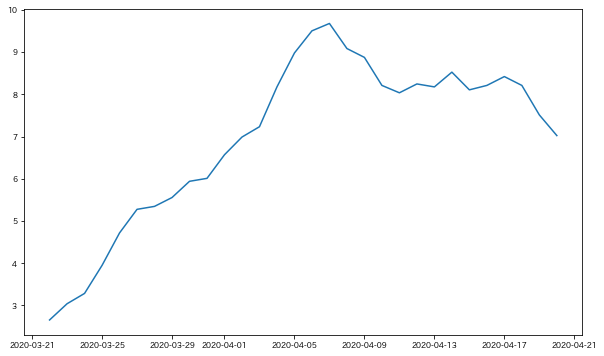

-----Algeria-----


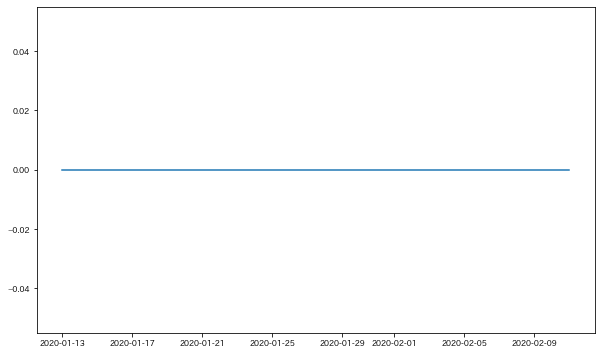

-----Angola-----


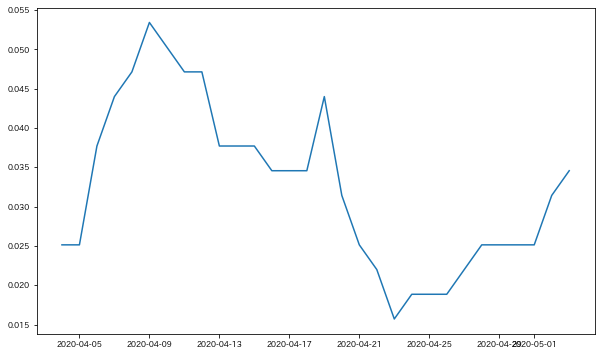

-----Argentina-----


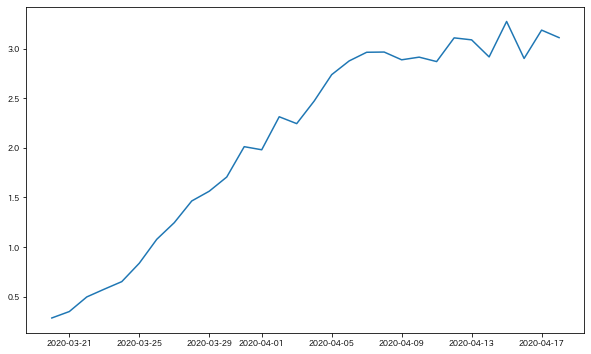

-----Armenia-----


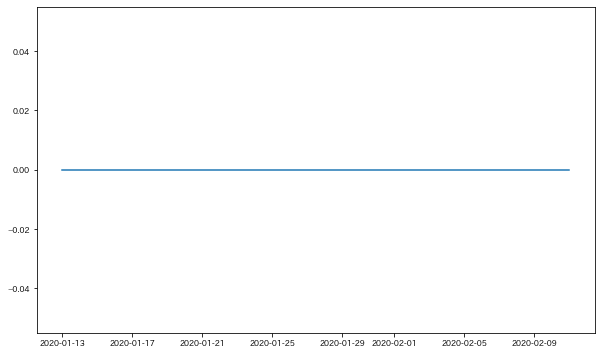

-----Australia-----


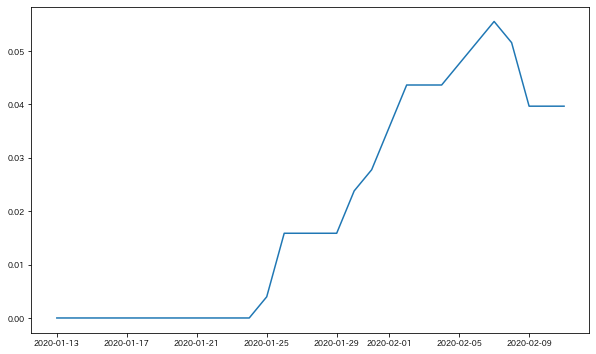

-----Austria-----


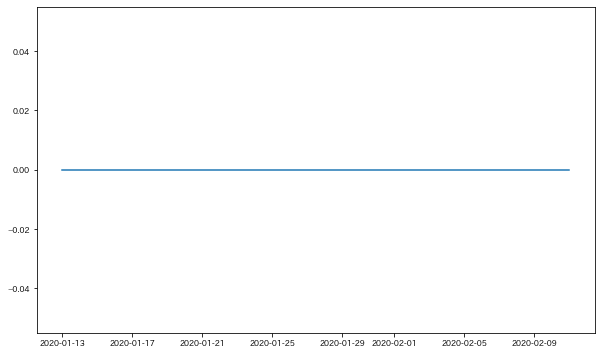

-----Azerbaijan-----


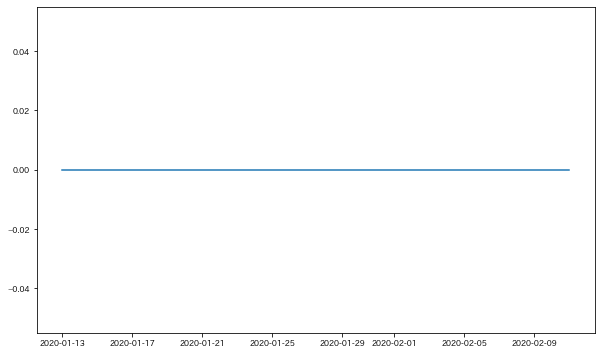

-----Bahrain-----


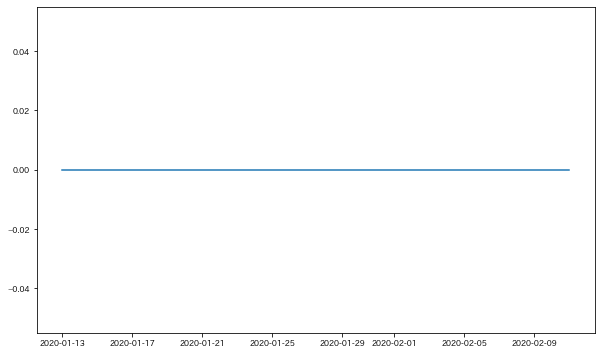

-----Bangladesh-----


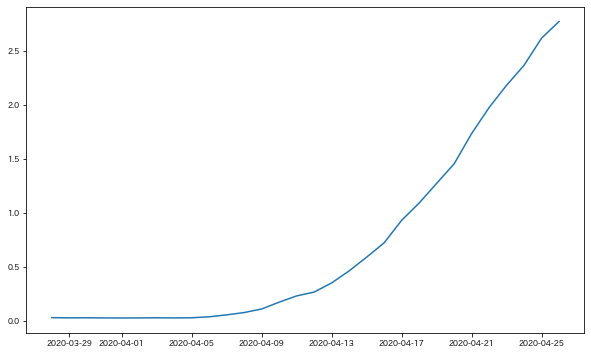

-----Barbados-----


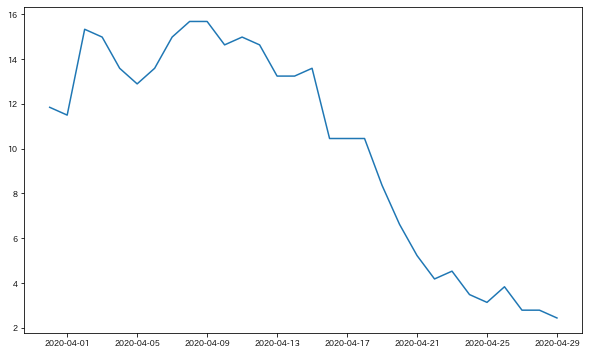

-----Belarus-----


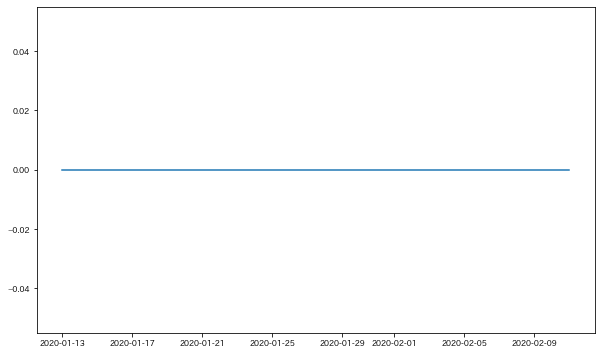

-----Belgium-----


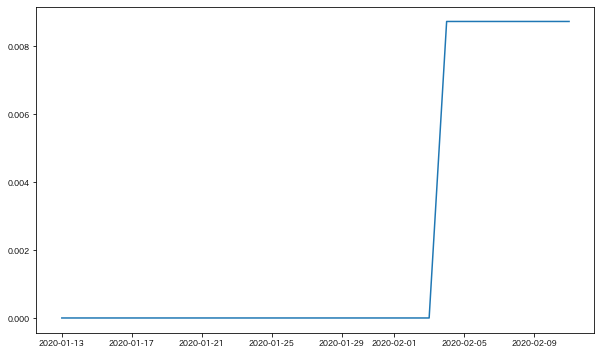

-----Belize-----


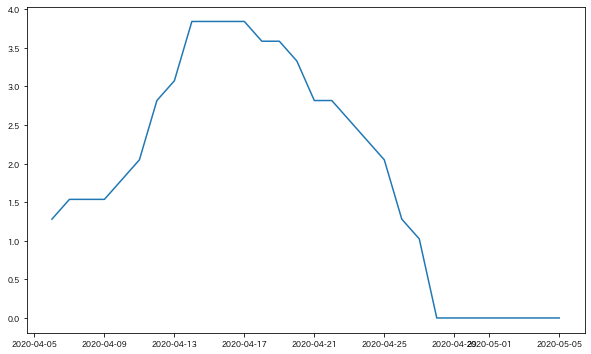

-----Benin-----


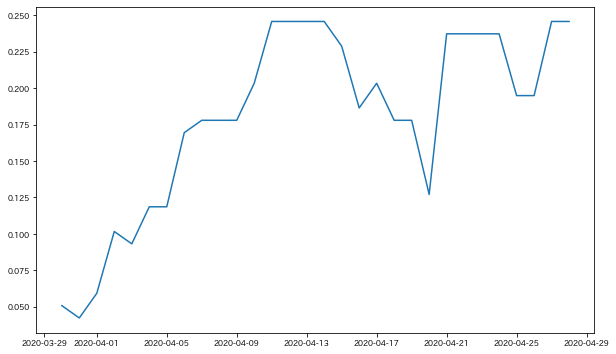

-----Bhutan-----


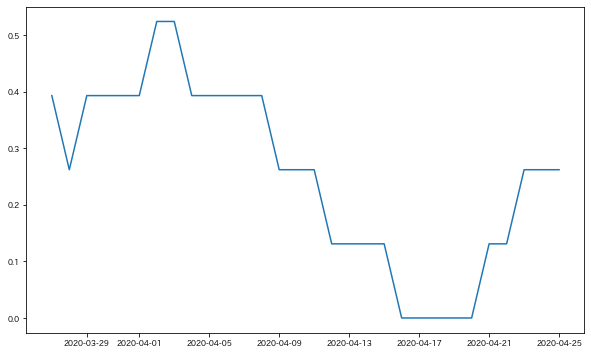

-----Bolivia-----


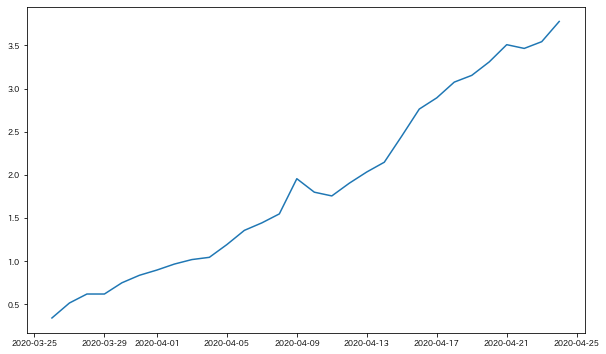

-----Bosnia_and_Herzegovina-----


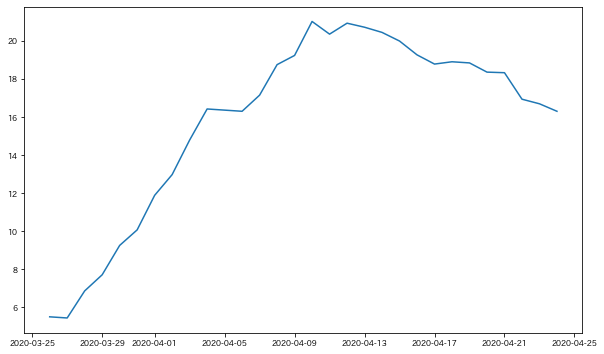

-----Botswana-----


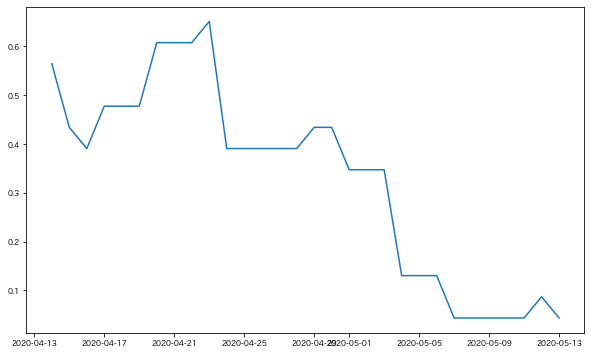

-----Brazil-----


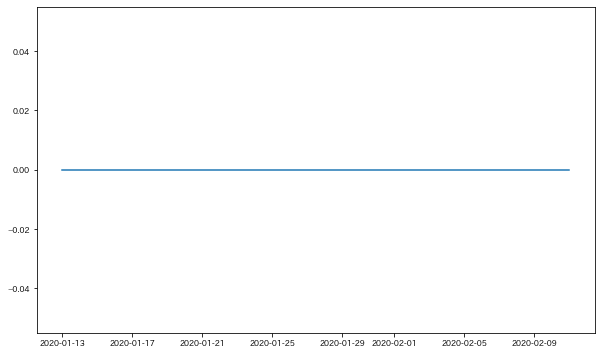

-----Brunei_Darussalam-----


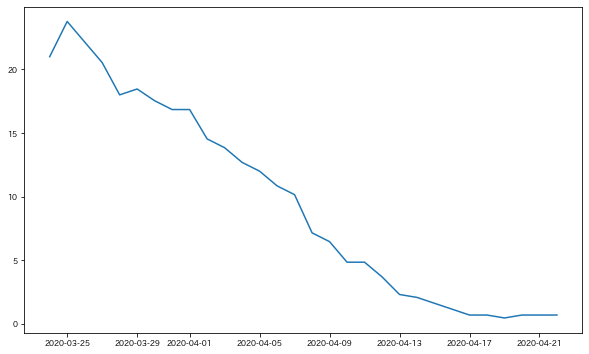

-----Bulgaria-----


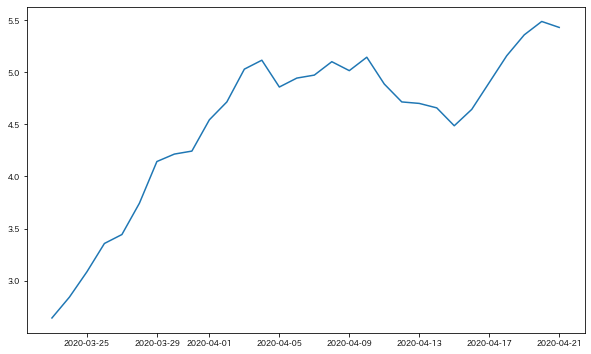

-----Burkina_Faso-----


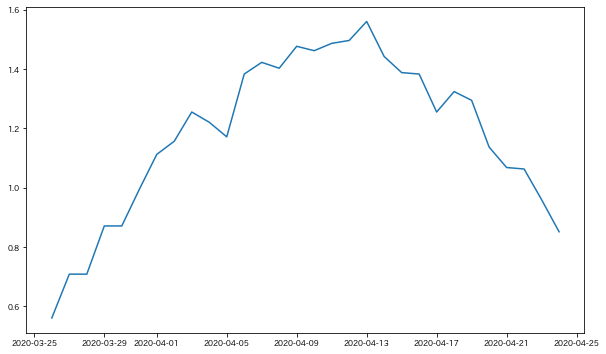

-----Burundi-----


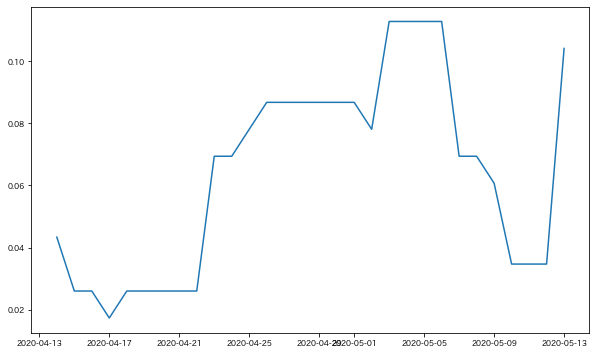

-----Cambodia-----


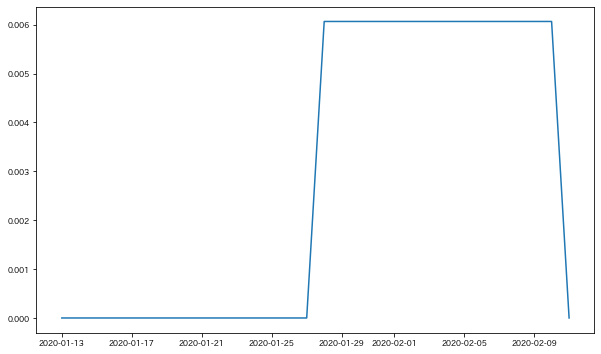

-----Cameroon-----


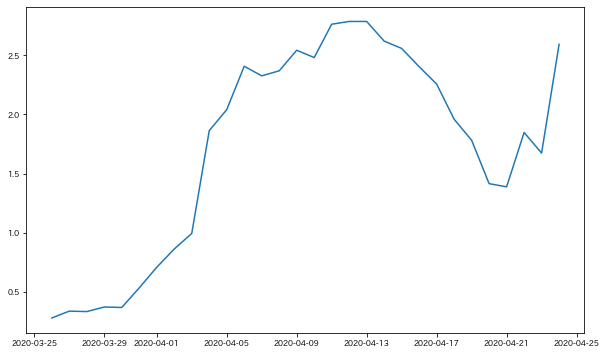

-----Canada-----


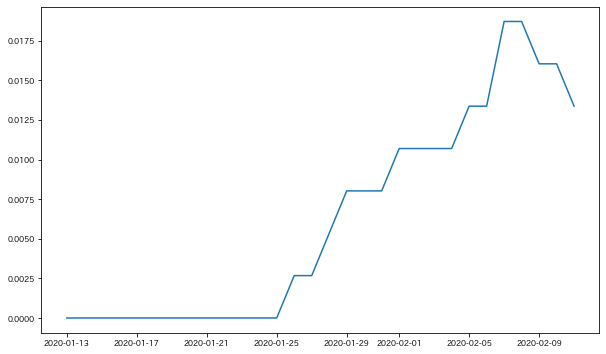

-----Cape_Verde-----


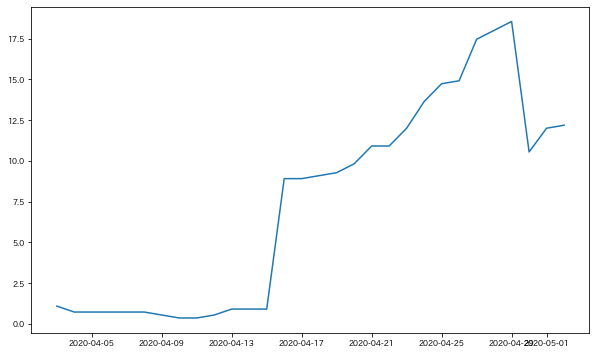

-----Central_African_Republic-----


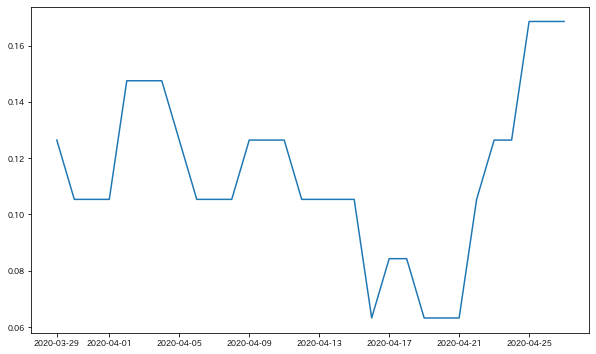

-----Chad-----


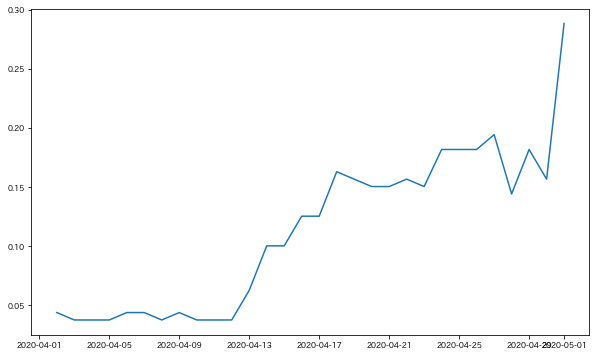

-----Chile-----


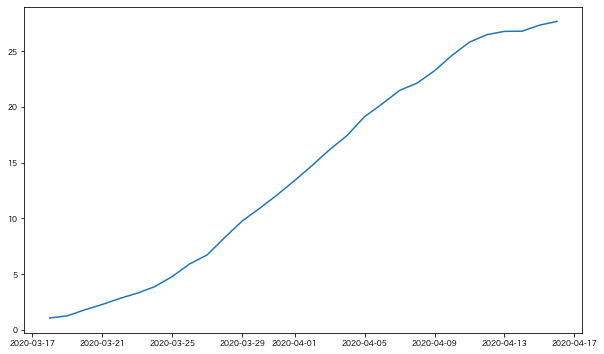

-----Colombia-----


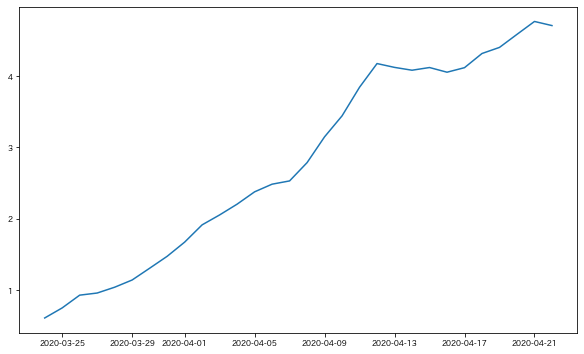

-----Congo-----


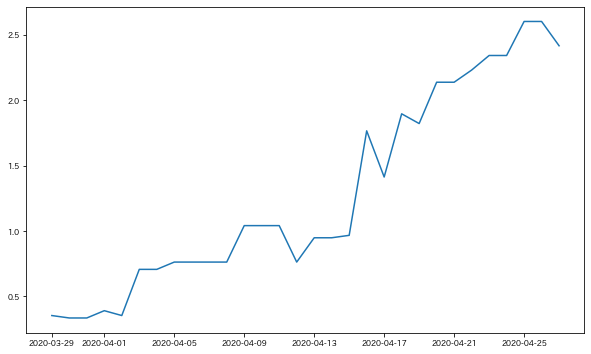

-----Costa_Rica-----


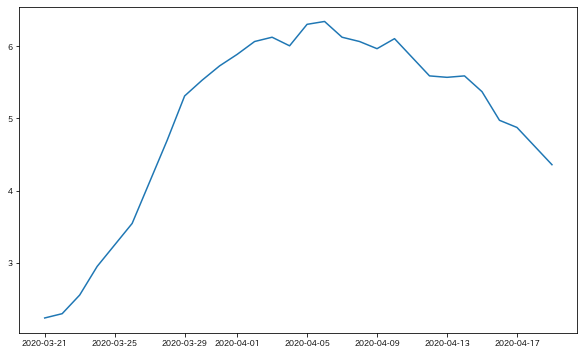

-----Cote_dIvoire-----


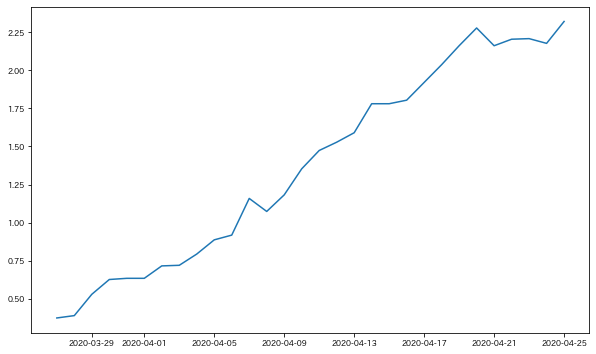

-----Croatia-----


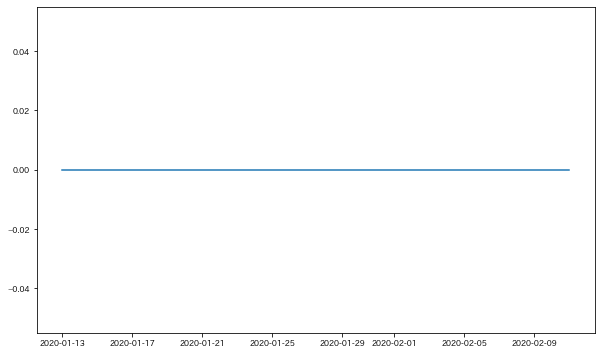

-----Cyprus-----


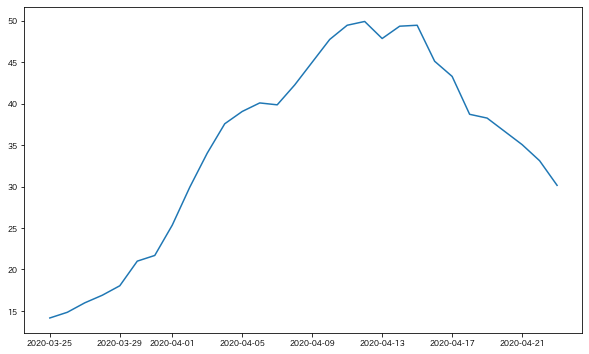

-----Czechia-----


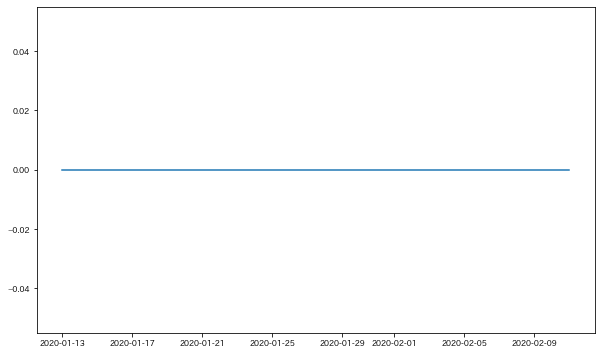

-----Democratic_Republic_of_the_Congo-----


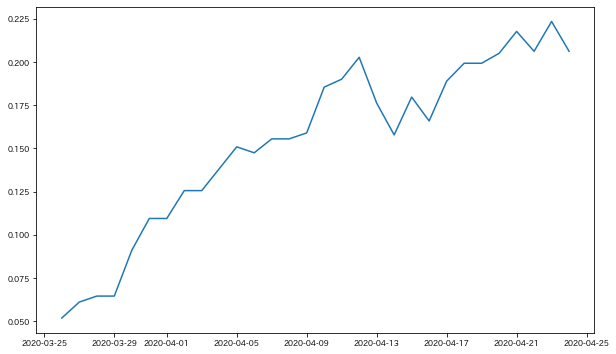

-----Denmark-----


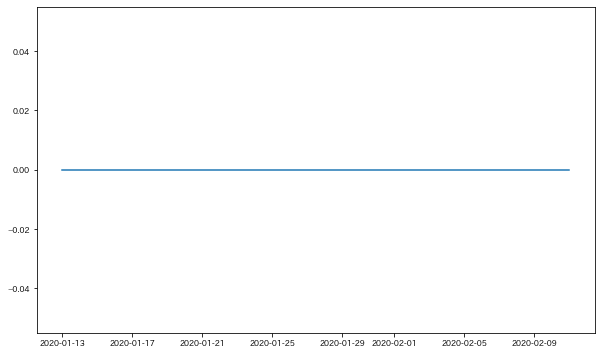

-----Dominican_Republic-----


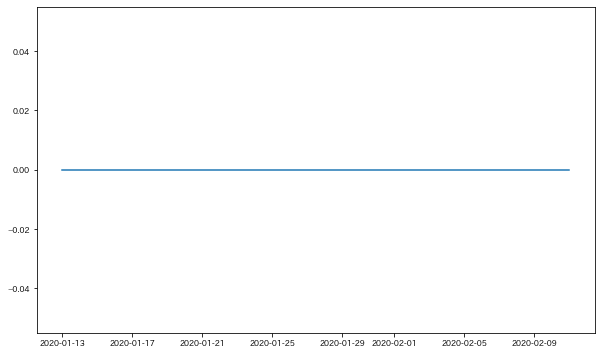

-----Ecuador-----


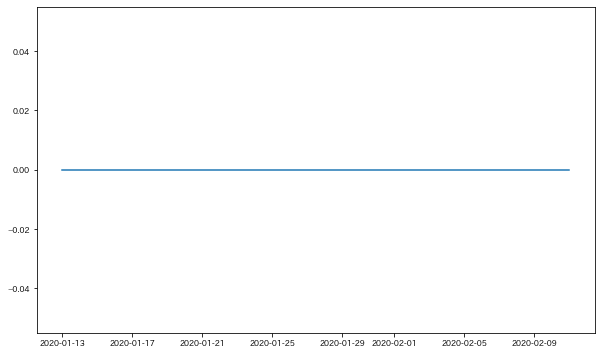

-----Egypt-----


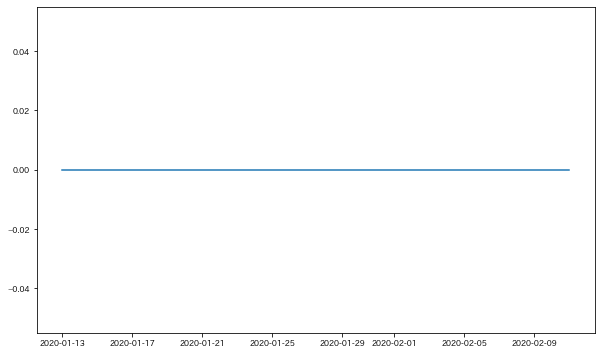

-----El_Salvador-----


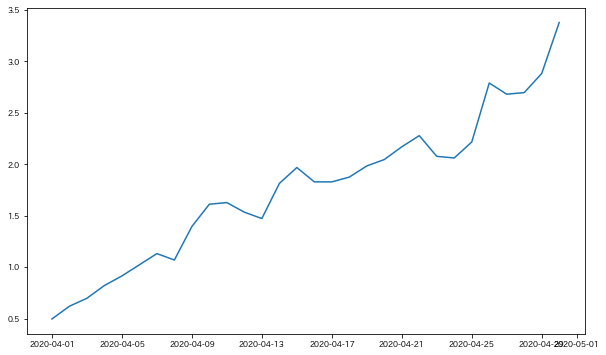

-----Estonia-----


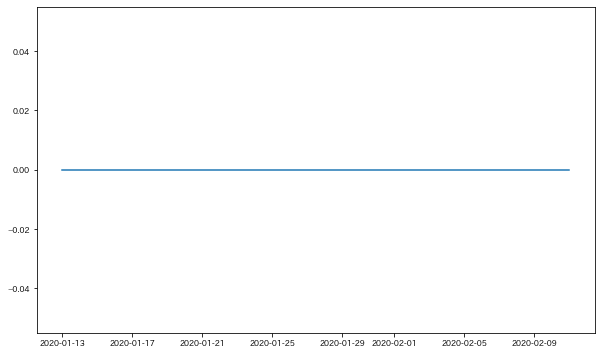

-----Ethiopia-----


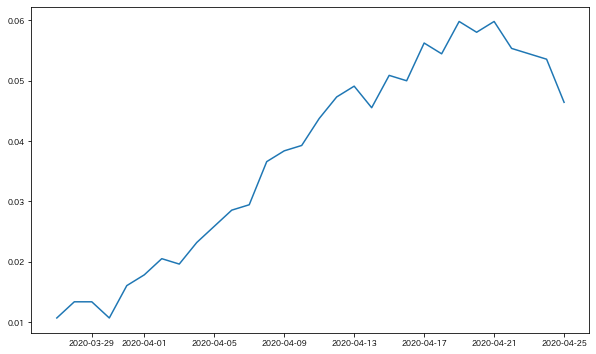

-----Fiji-----


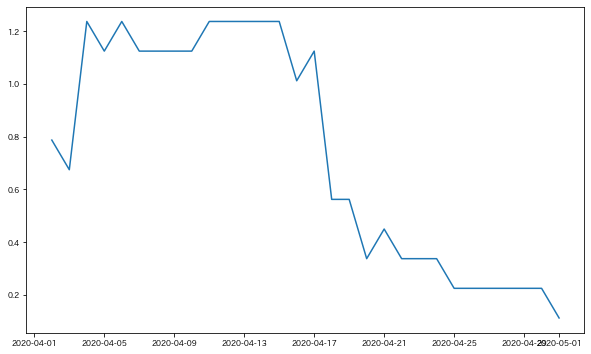

-----Finland-----


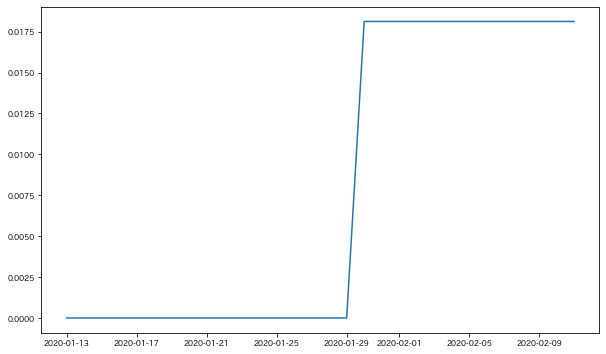

-----France-----


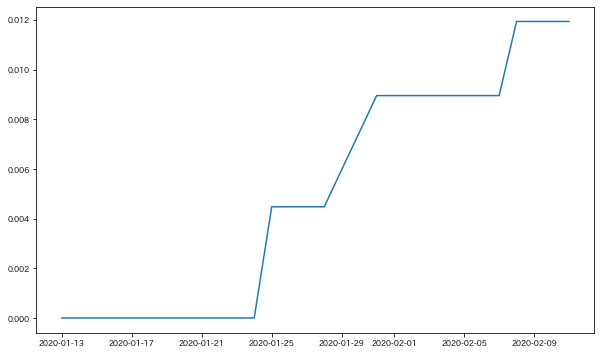

-----Gabon-----


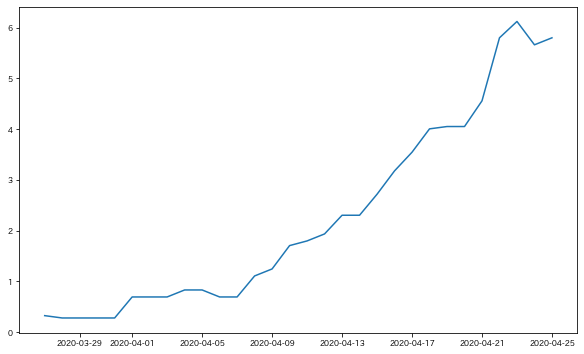

-----Gambia-----


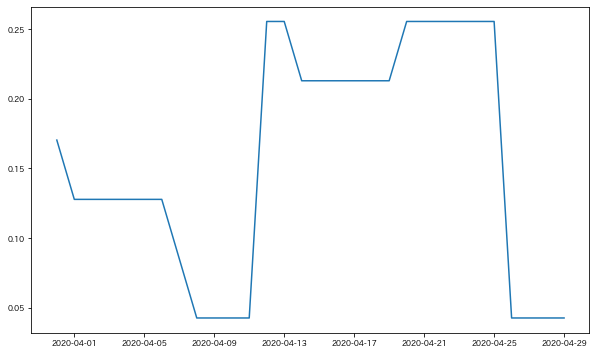

-----Georgia-----


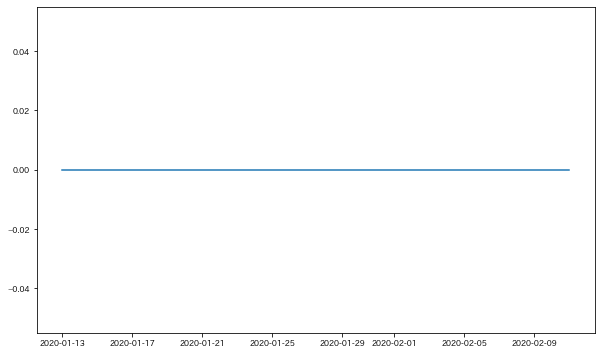

-----Germany-----


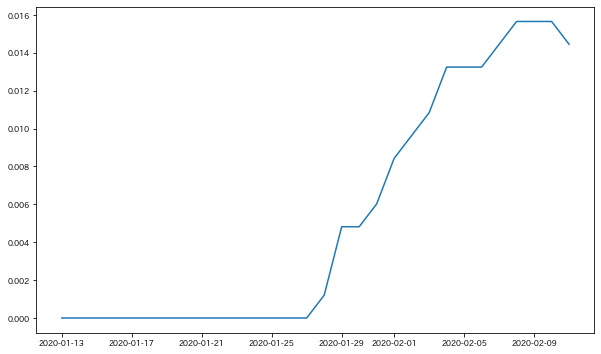

-----Ghana-----


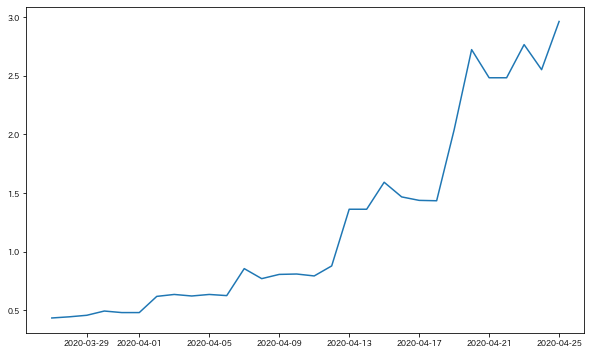

-----Greece-----


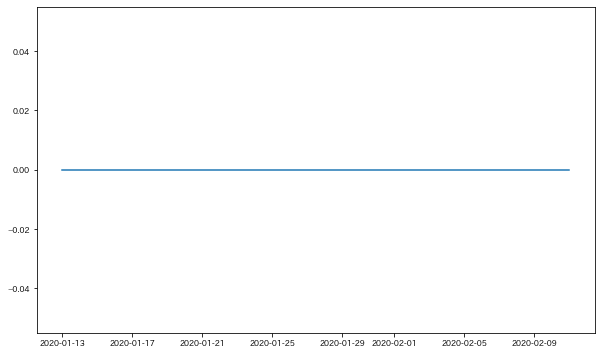

-----Guatemala-----


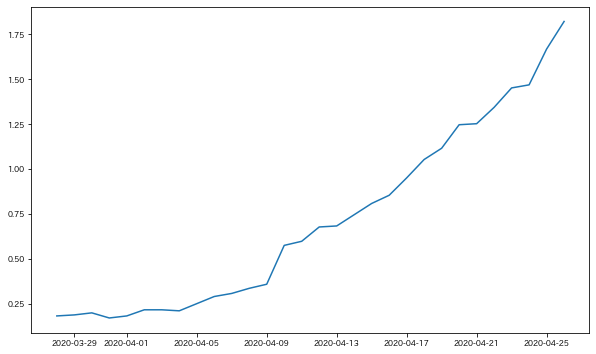

-----Guinea-----


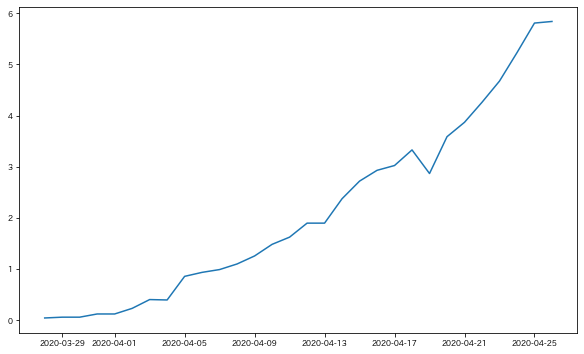

-----Guinea_Bissau-----


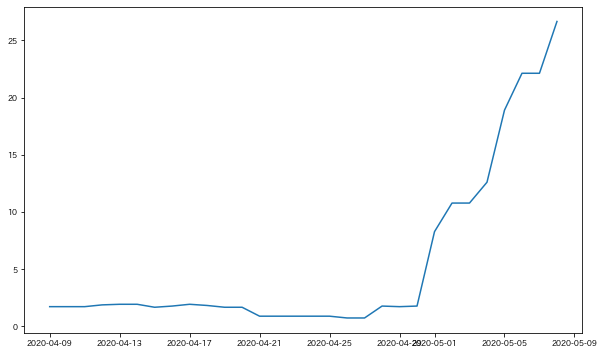

-----Guyana-----


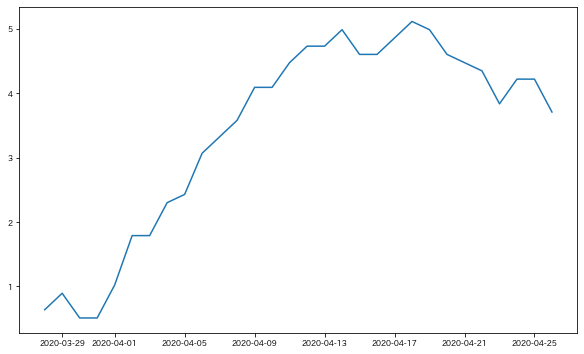

-----Haiti-----


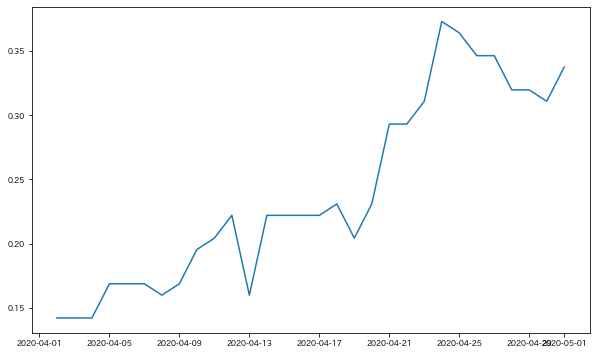

-----Honduras-----


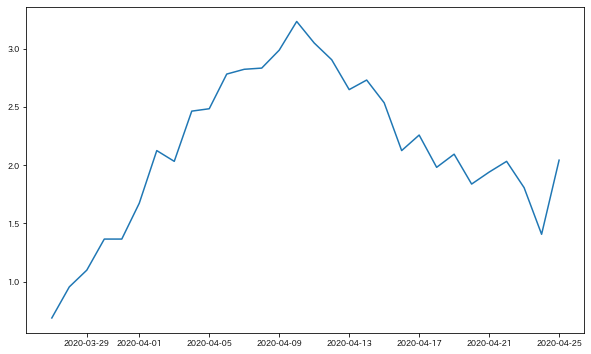

-----Hungary-----


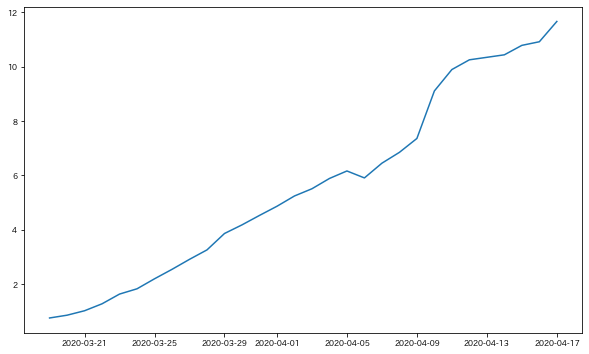

-----Iceland-----


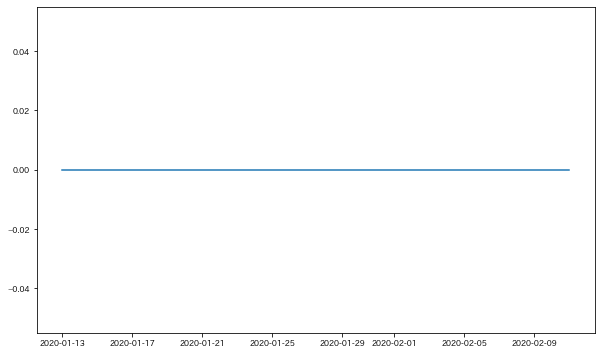

-----India-----


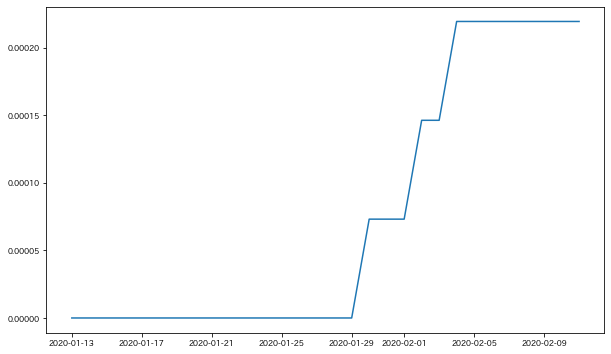

-----Indonesia-----


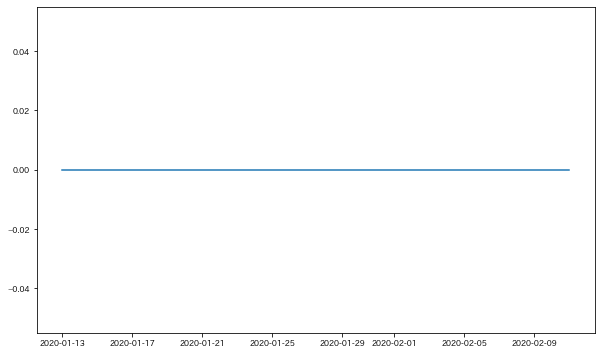

-----Iran-----


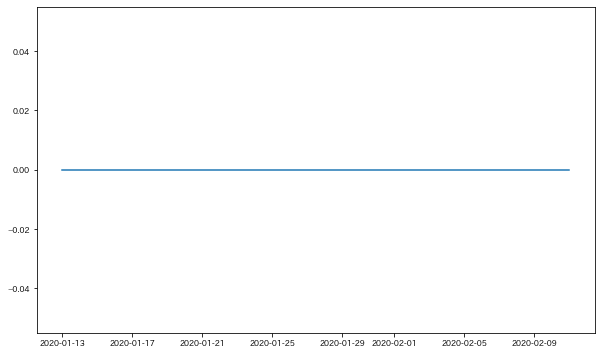

-----Iraq-----


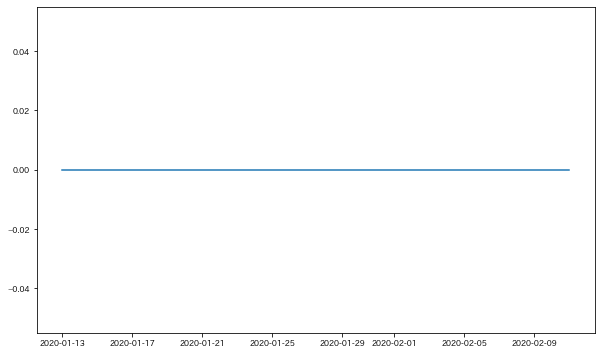

-----Ireland-----


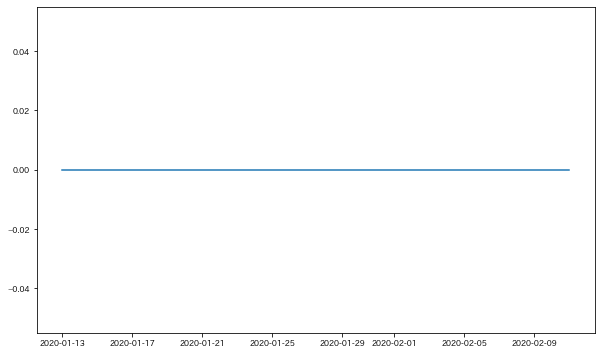

-----Israel-----


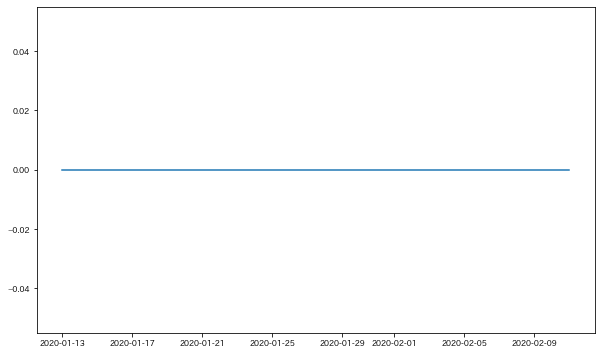

-----Italy-----


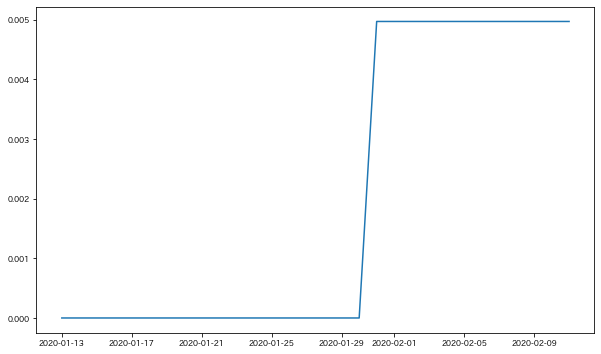

-----Jamaica-----


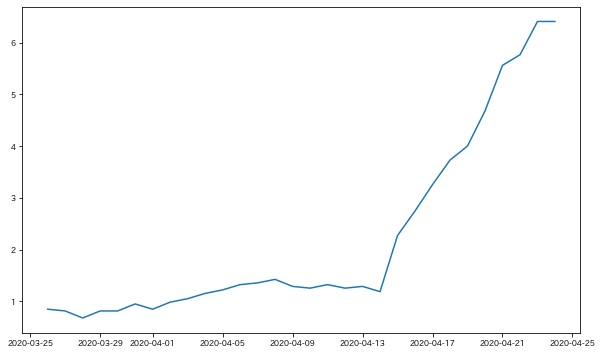

-----Japan-----


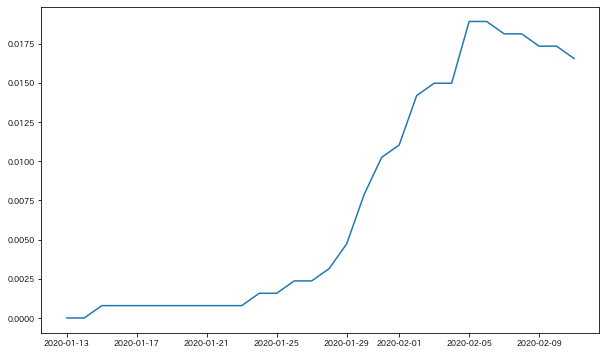

-----Jordan-----


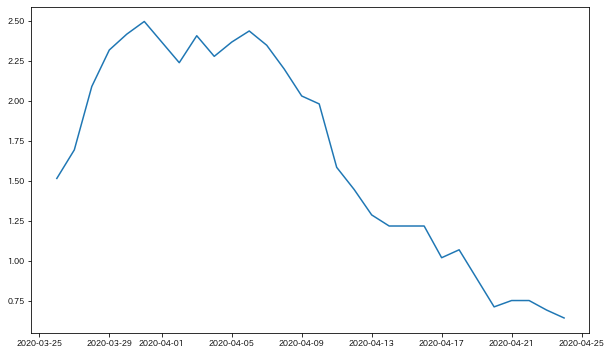

-----Kazakhstan-----


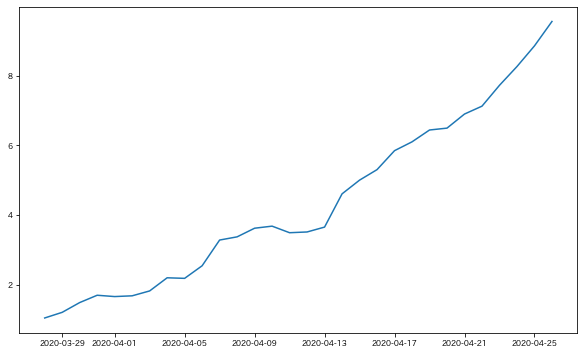

-----Kenya-----


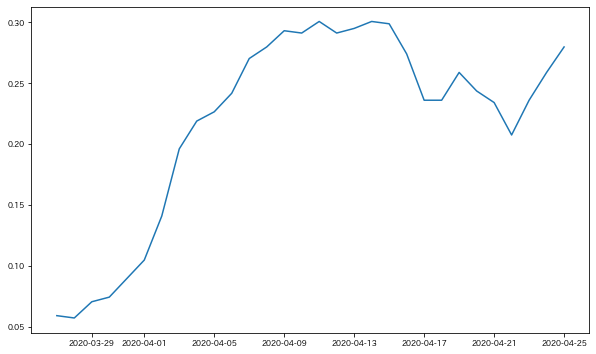

-----Kuwait-----


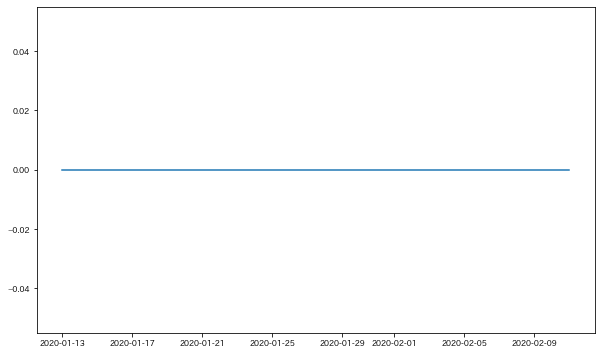

-----Kyrgyzstan-----


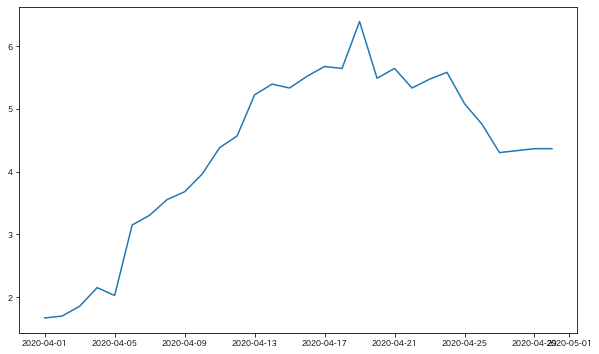

-----Laos-----


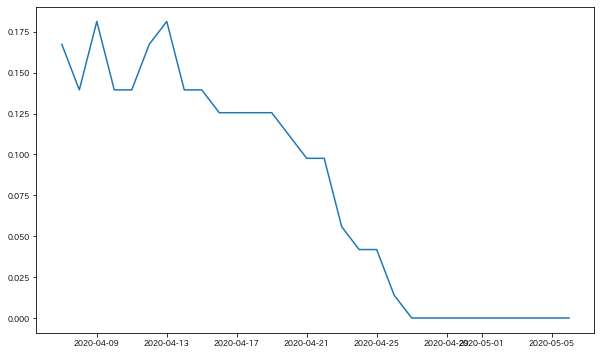

-----Latvia-----


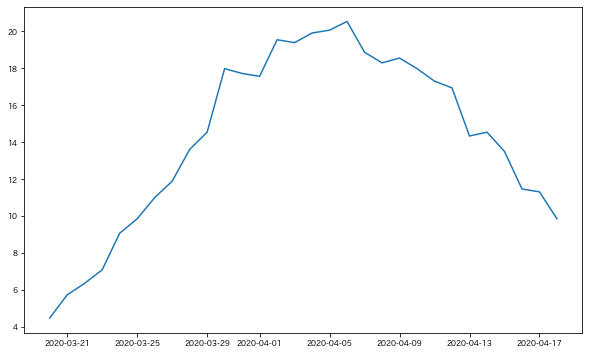

-----Lebanon-----


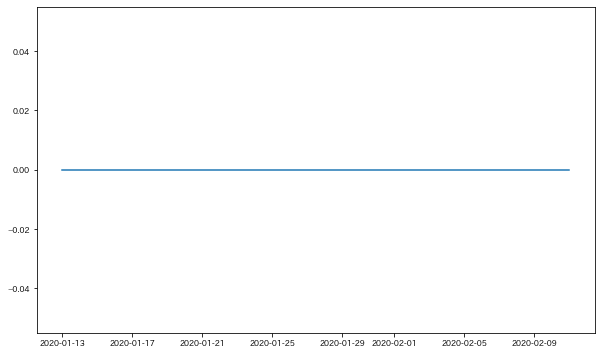

-----Liberia-----


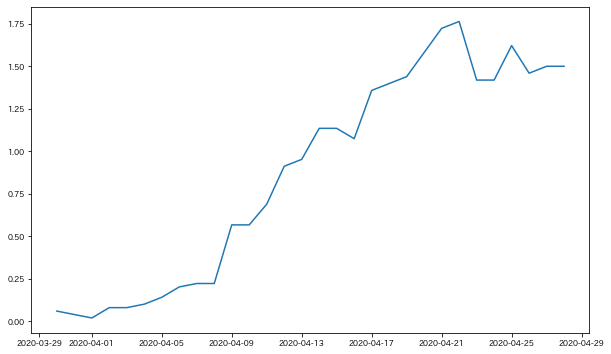

-----Libya-----


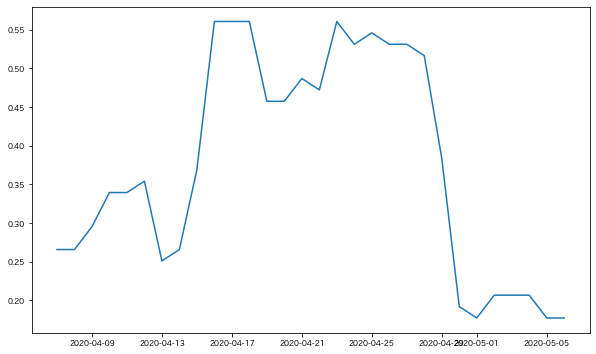

-----Lithuania-----


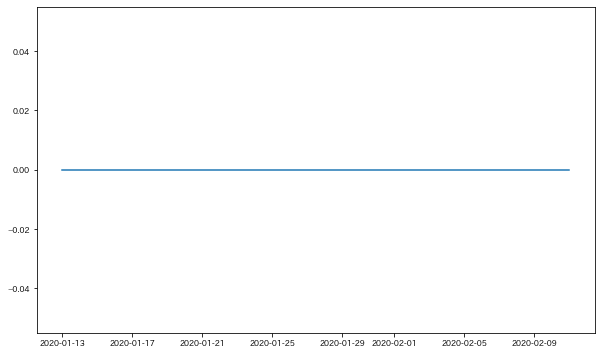

-----Luxembourg-----


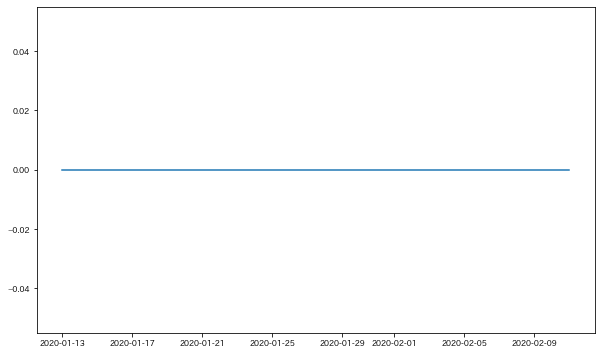

-----Madagascar-----


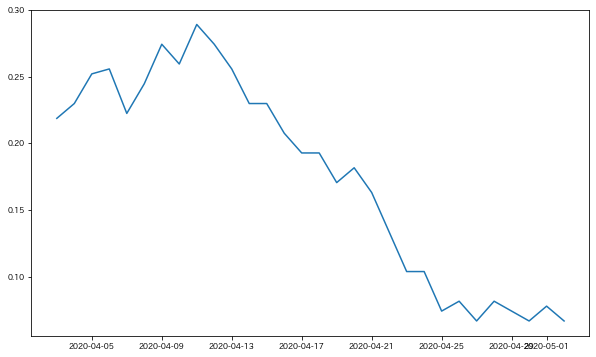

-----Malawi-----


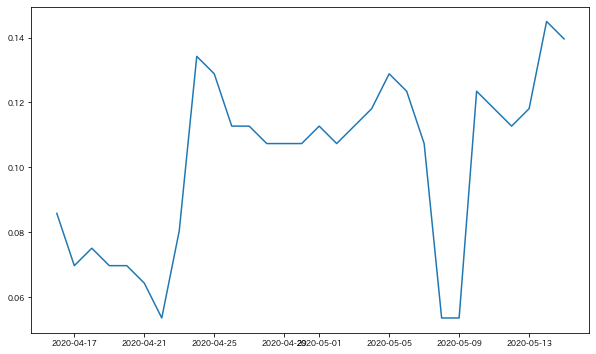

-----Malaysia-----


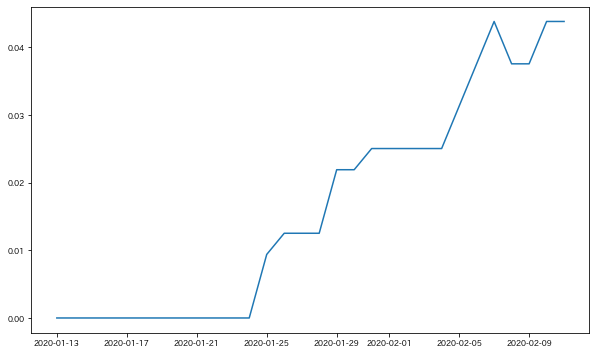

-----Mali-----


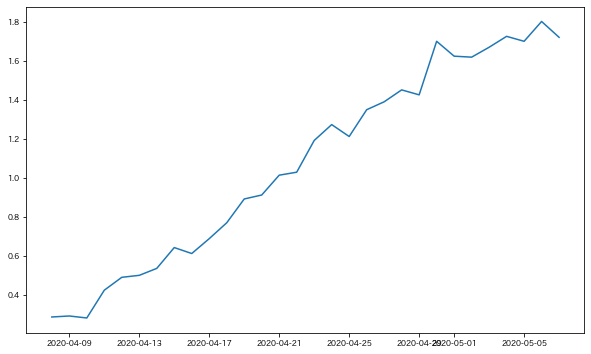

-----Malta-----


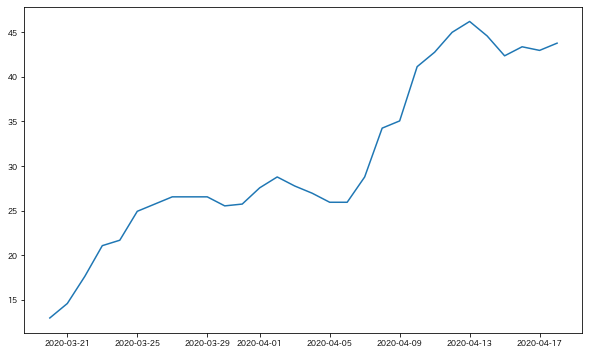

-----Mauritania-----


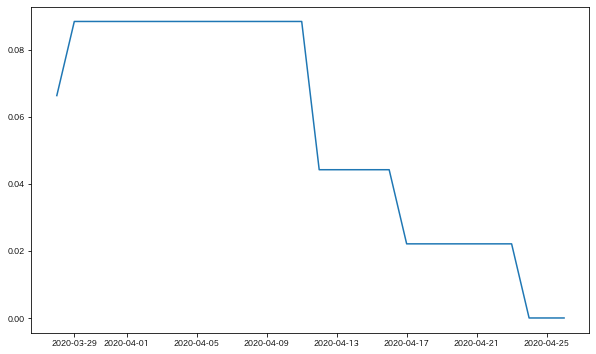

-----Mauritius-----


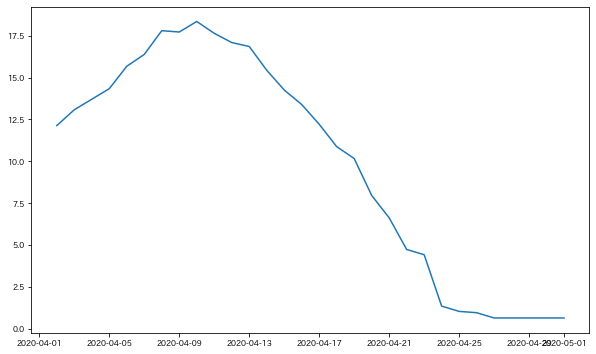

-----Mexico-----


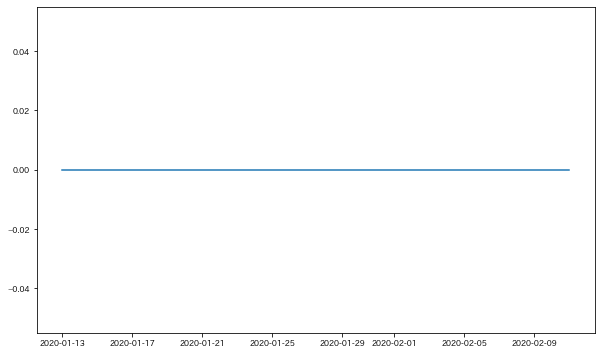

-----Moldova-----


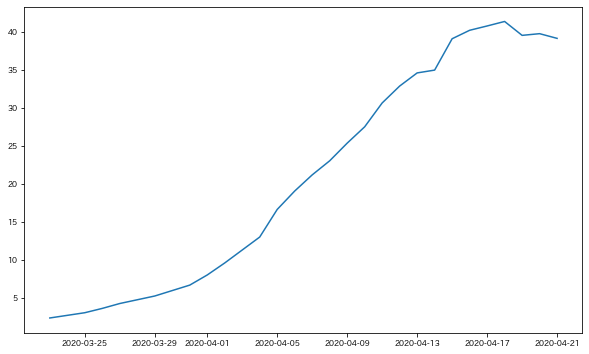

-----Mongolia-----


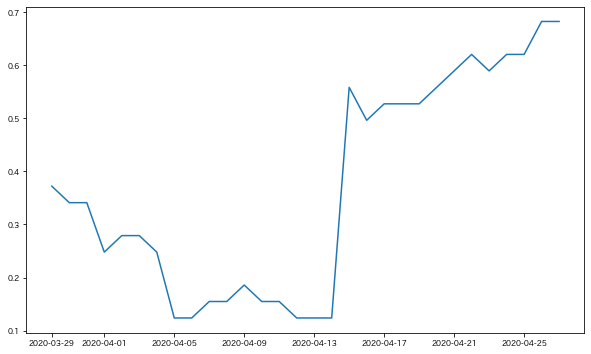

-----Montenegro-----


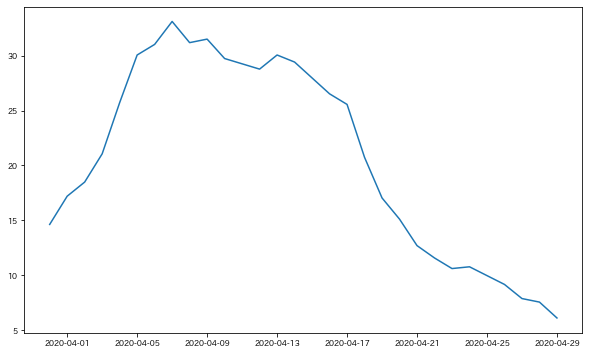

-----Morocco-----


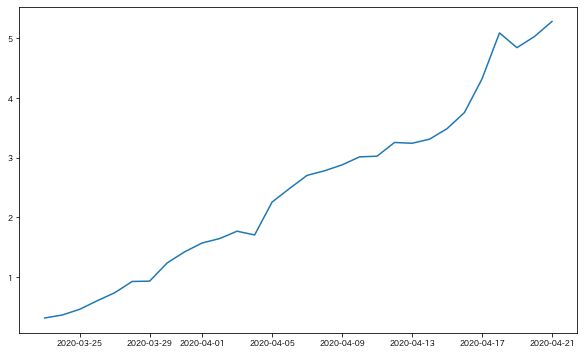

-----Mozambique-----


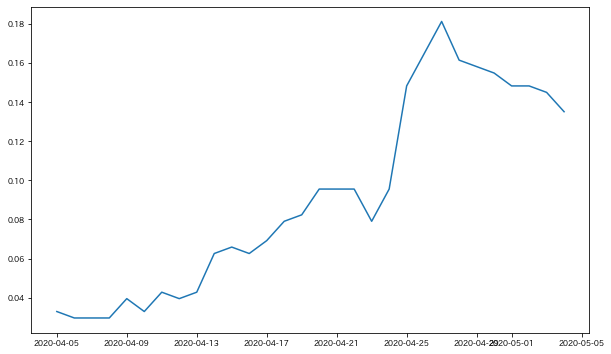

-----Myanmar-----


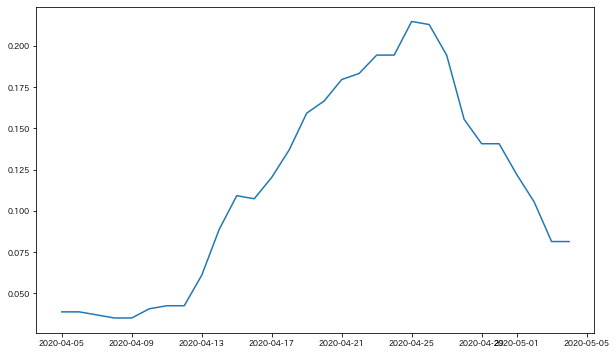

-----Namibia-----


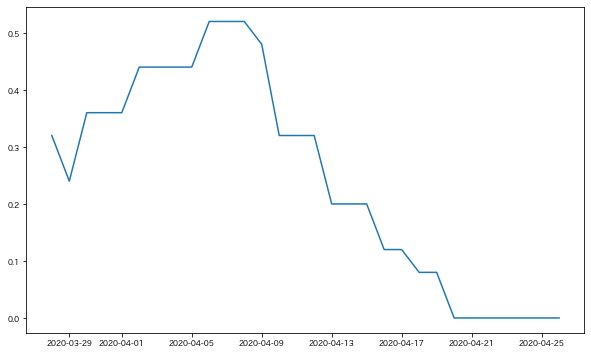

-----Nepal-----


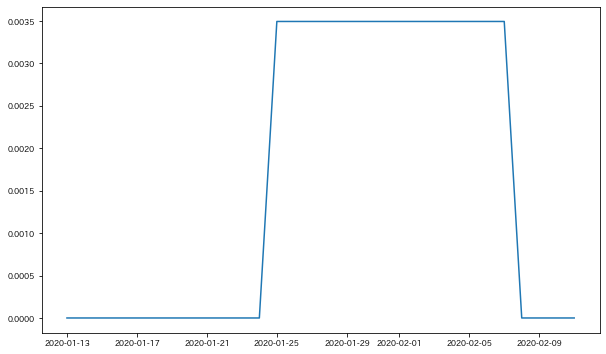

-----Netherlands-----


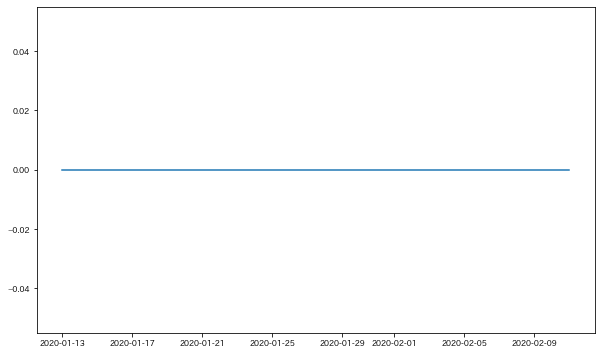

-----New_Zealand-----


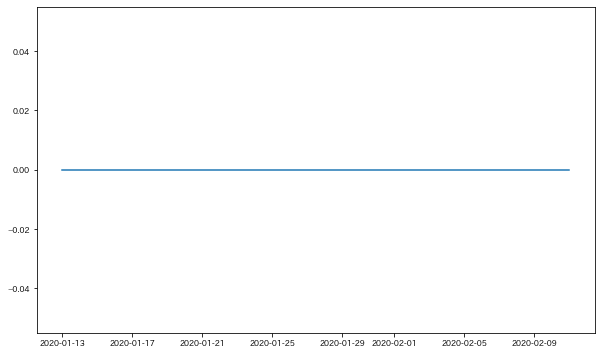

-----Nicaragua-----


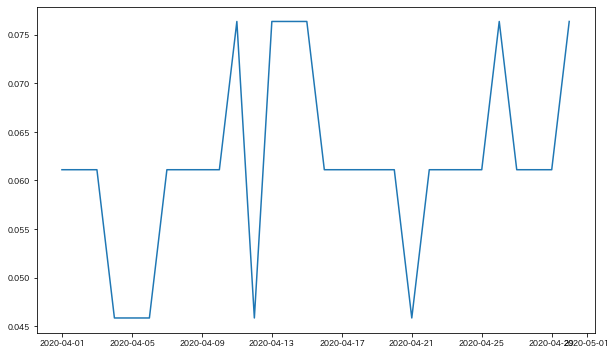

-----Niger-----


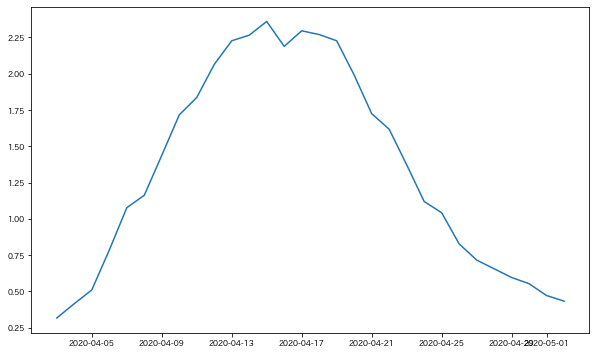

-----Nigeria-----


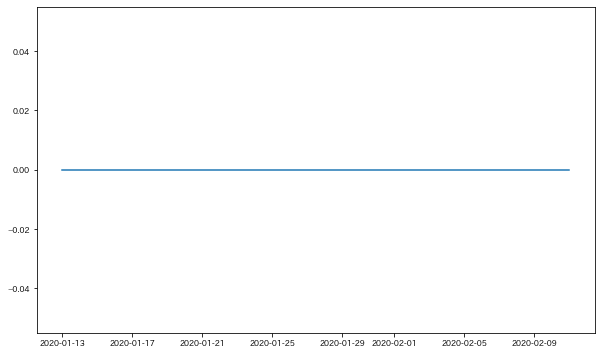

-----North_Macedonia-----


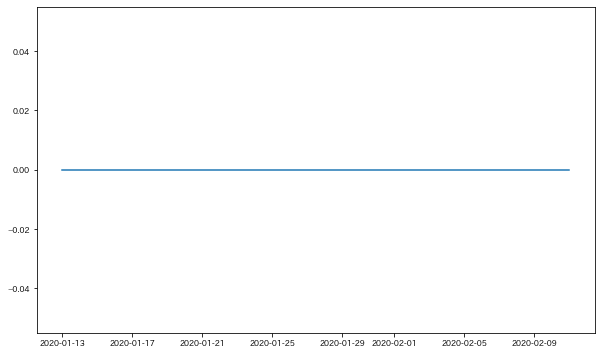

-----Norway-----


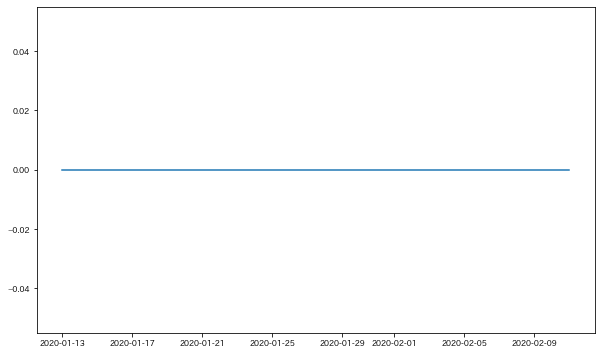

-----Oman-----


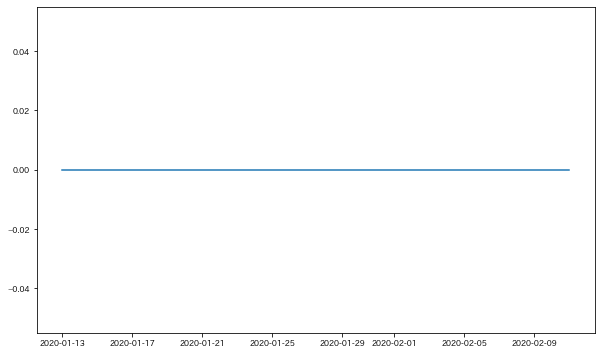

-----Pakistan-----


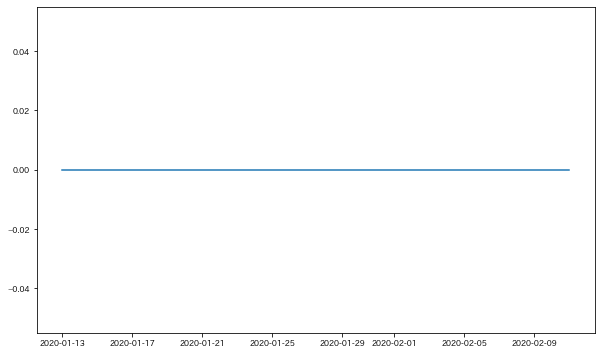

-----Panama-----


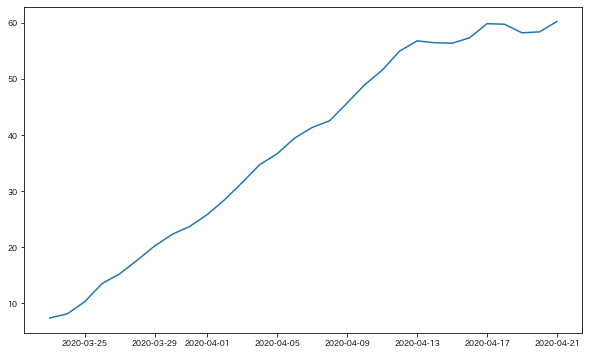

-----Papua_New_Guinea-----


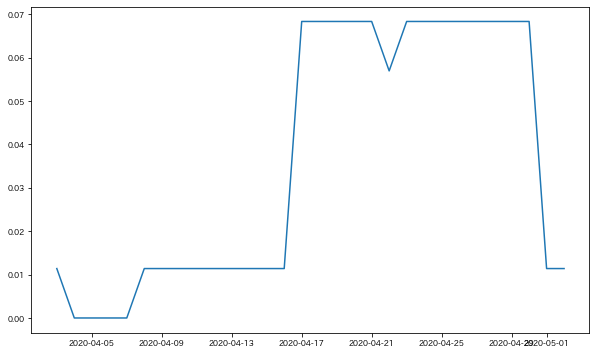

-----Paraguay-----


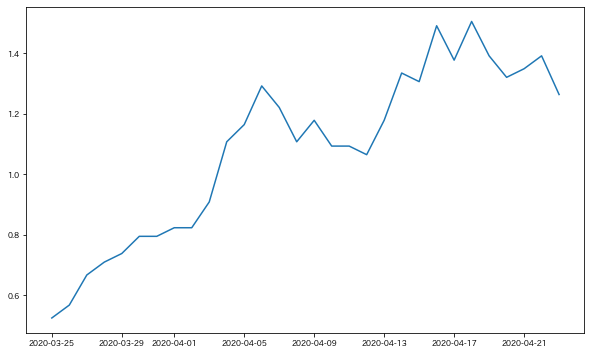

-----Peru-----


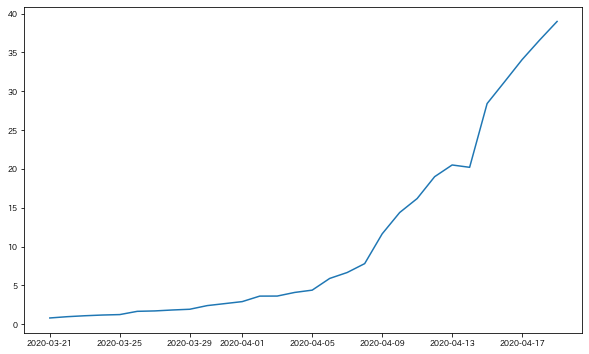

-----Philippines-----


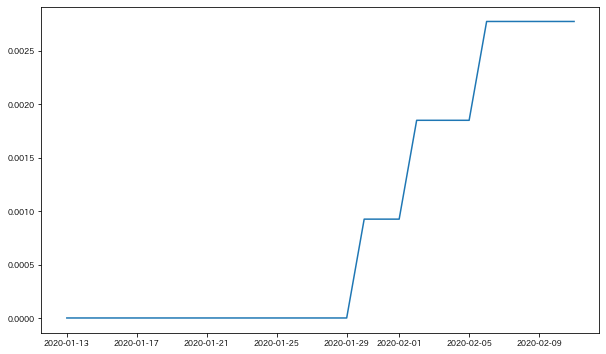

-----Poland-----


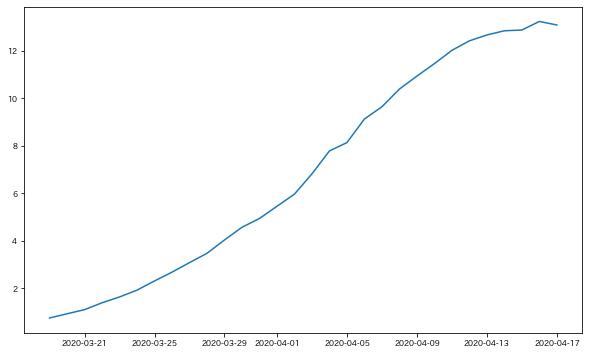

-----Portugal-----


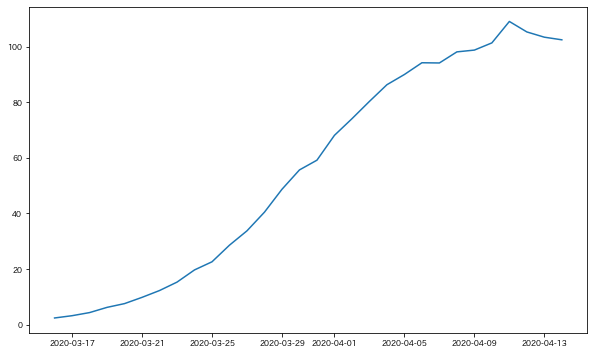

-----Qatar-----


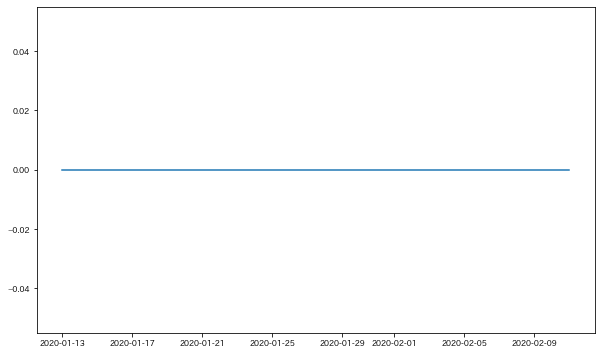

-----Romania-----


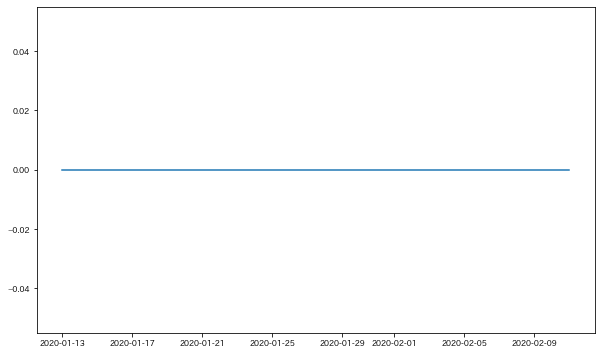

-----Russia-----


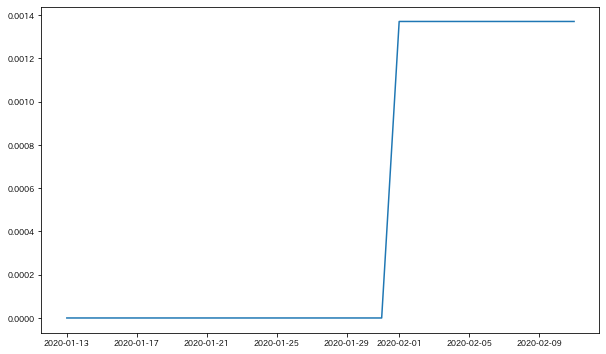

-----Rwanda-----


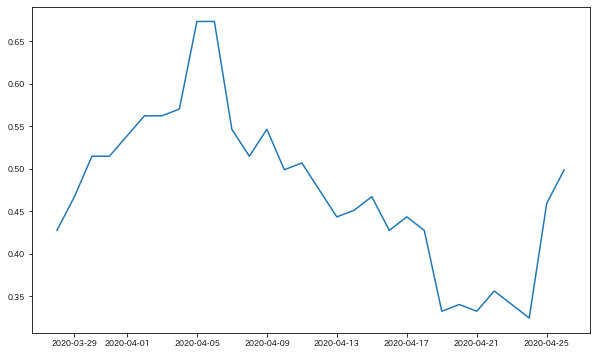

-----Saudi_Arabia-----


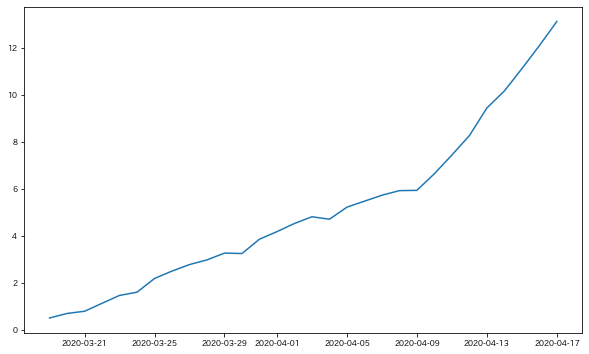

-----Senegal-----


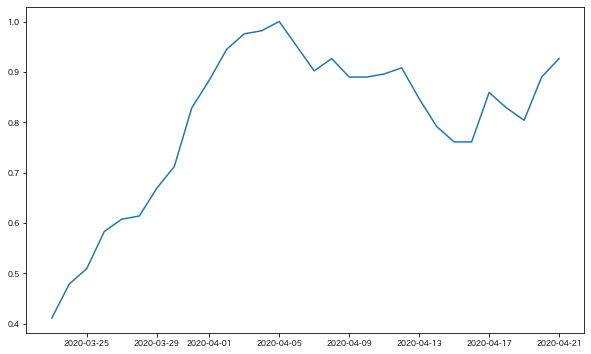

-----Serbia-----


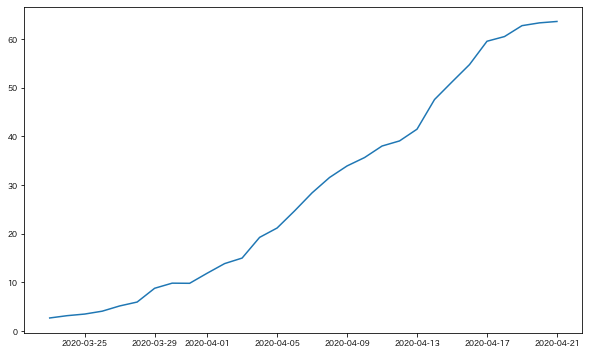

-----Seychelles-----


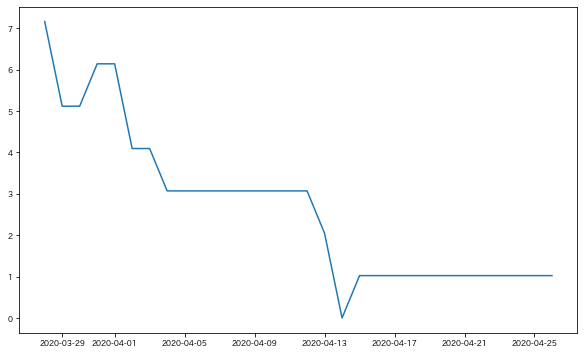

-----Sierra_Leone-----


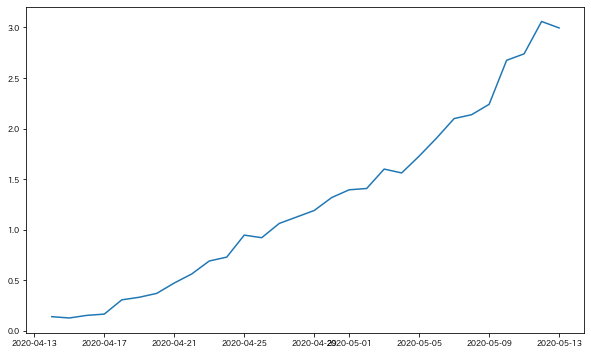

-----Singapore-----


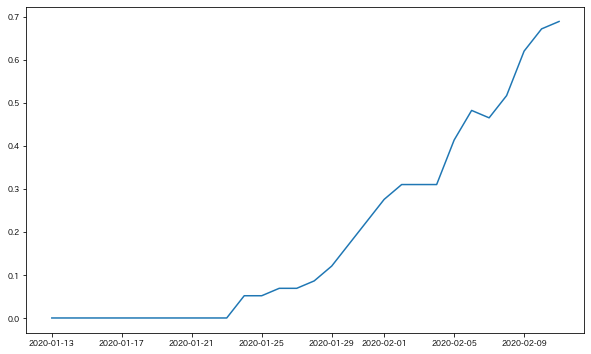

-----Slovakia-----


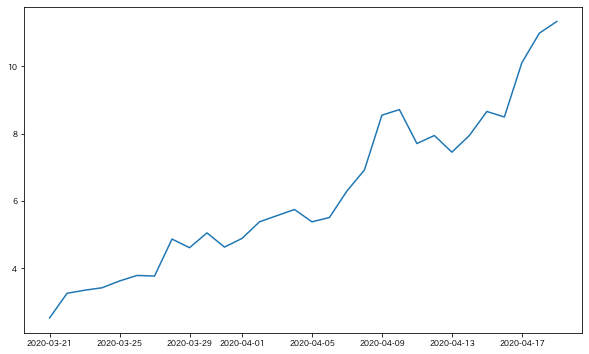

-----Slovenia-----


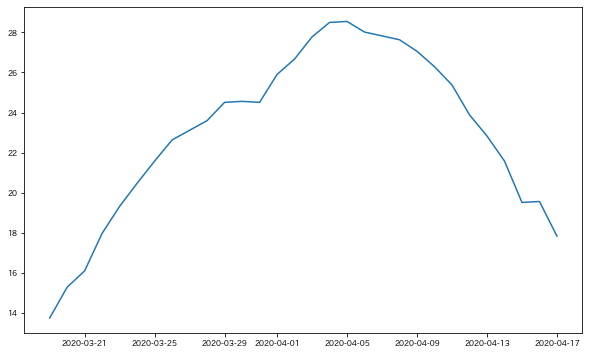

-----South_Africa-----


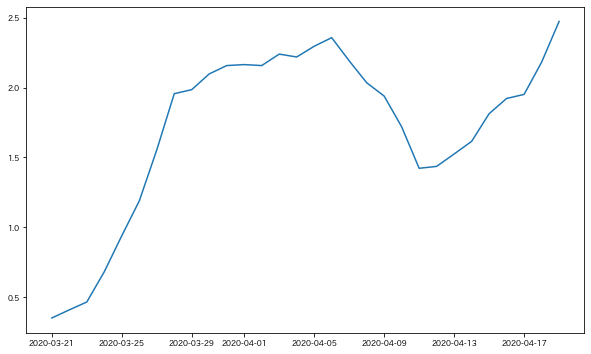

-----South_Korea-----


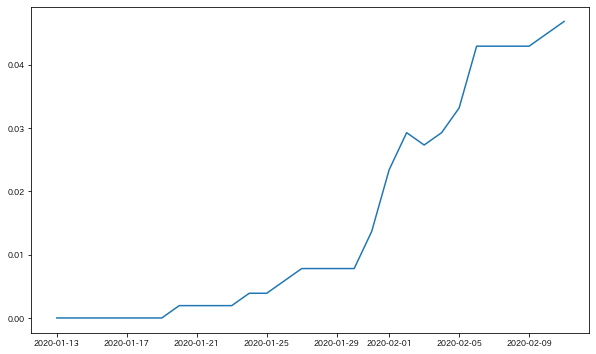

-----Spain-----


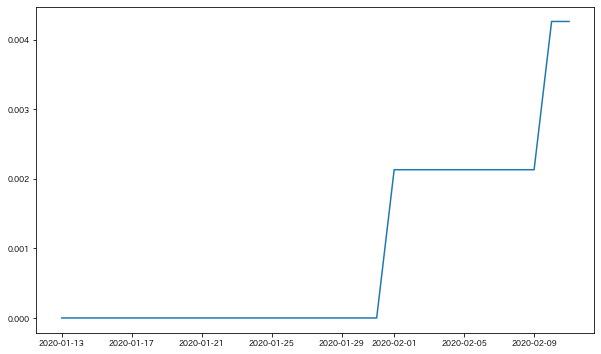

-----Sri_Lanka-----


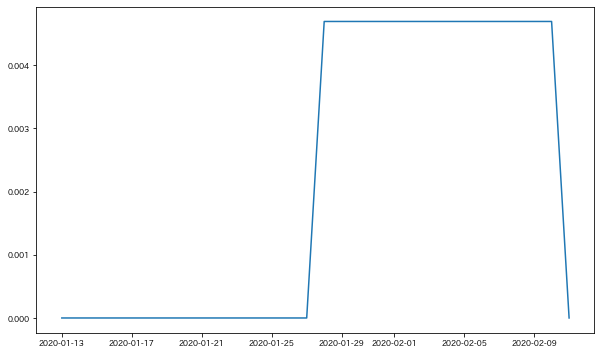

-----Sudan-----


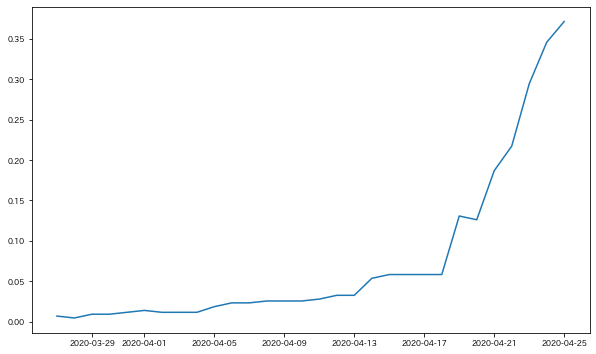

-----Suriname-----


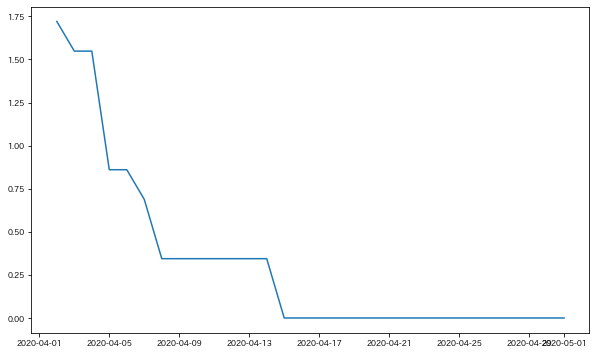

-----Sweden-----


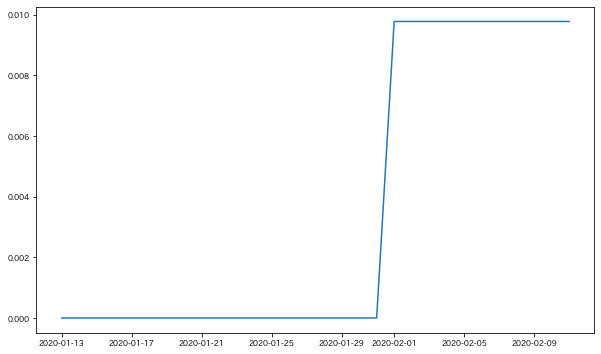

-----Switzerland-----


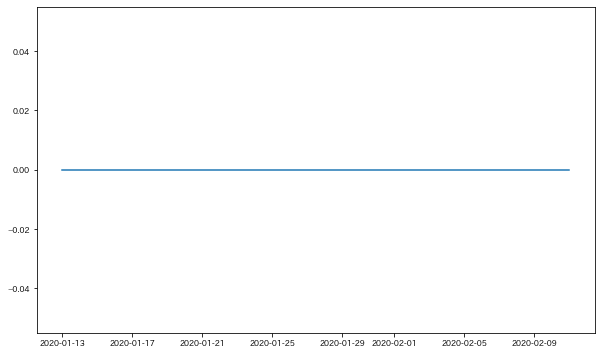

-----Thailand-----


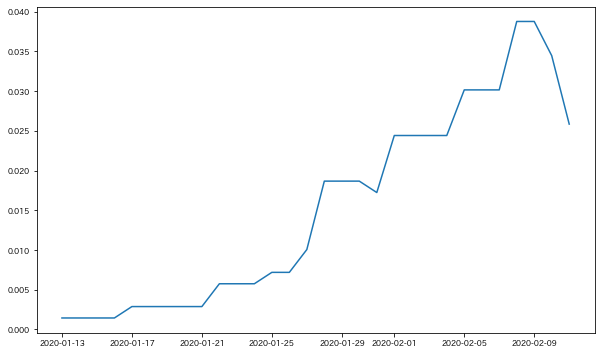

-----Timor_Leste-----


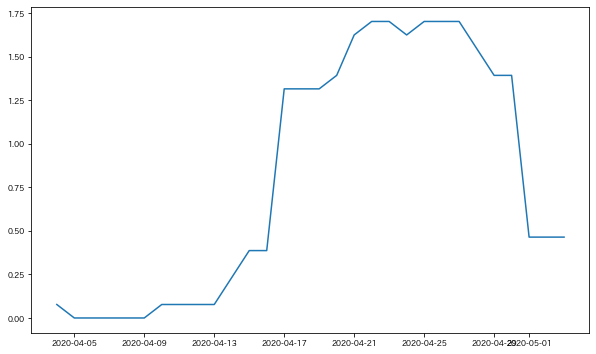

-----Togo-----


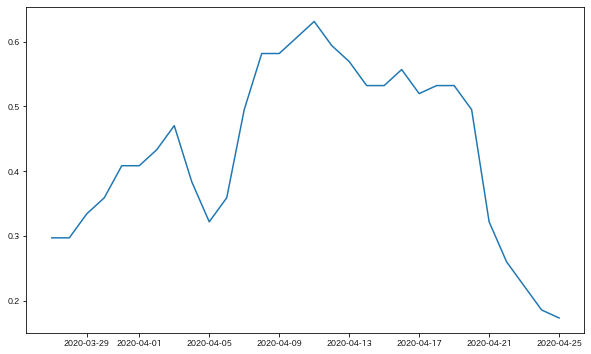

-----Trinidad_and_Tobago-----


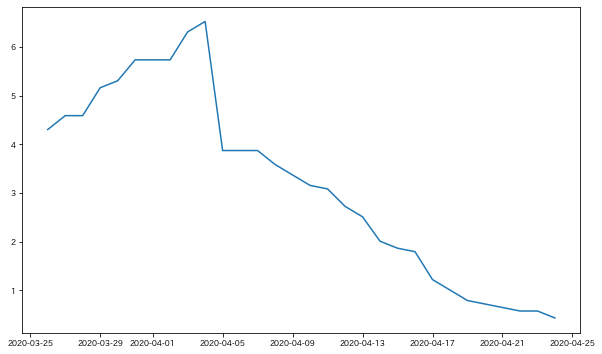

-----Tunisia-----


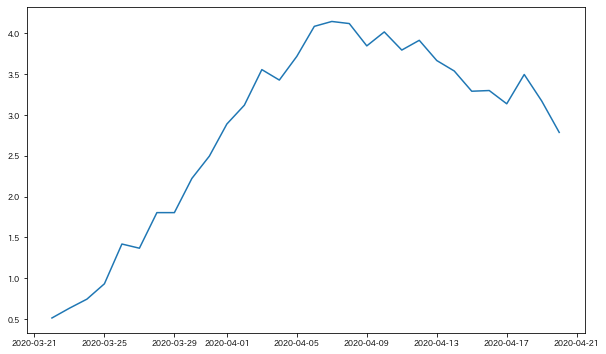

-----Turkey-----


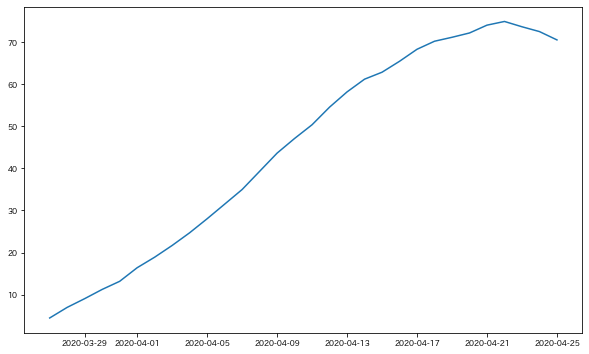

-----Uganda-----


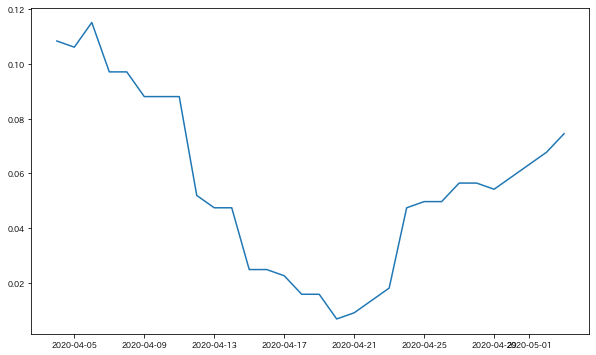

-----Ukraine-----


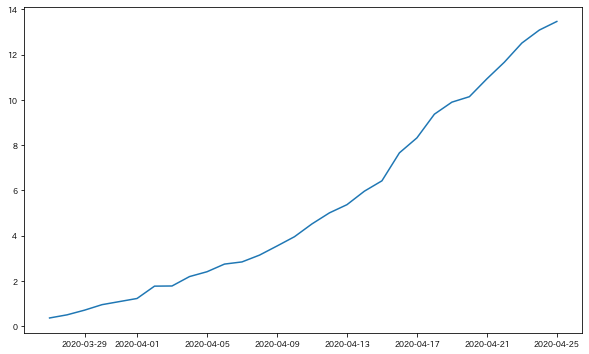

-----United_Arab_Emirates-----


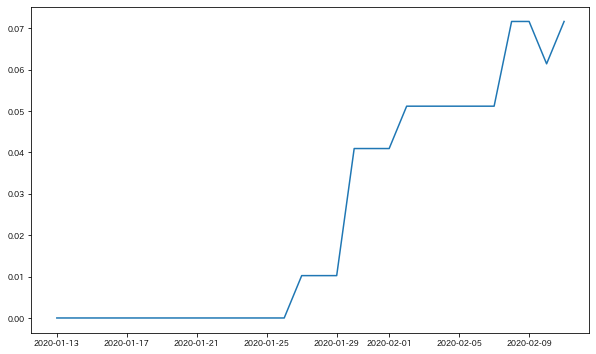

-----United_Kingdom-----


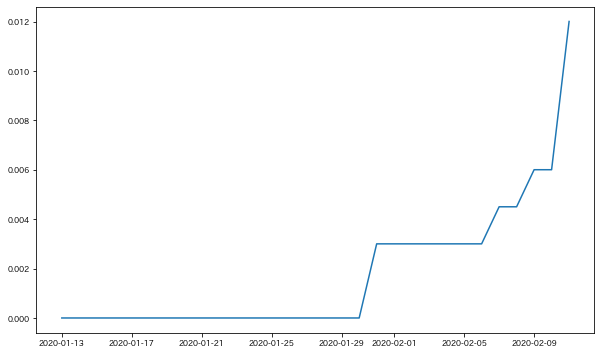

-----United_Republic_of_Tanzania-----


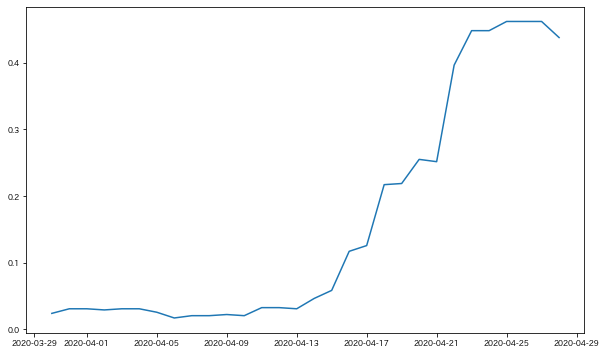

-----United_States_of_America-----


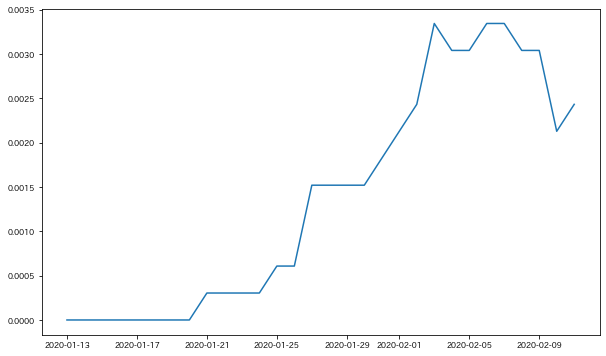

-----Uruguay-----


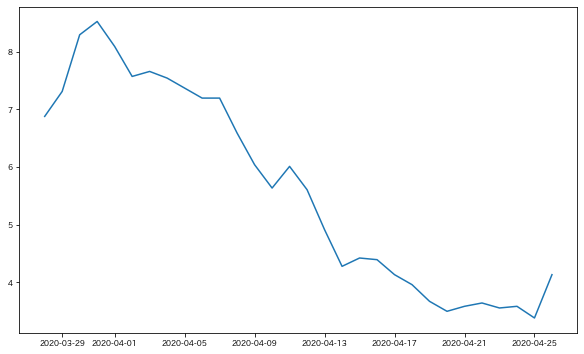

-----Venezuela-----


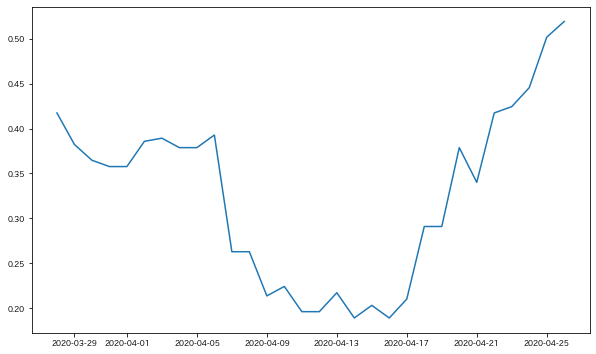

-----Vietnam-----


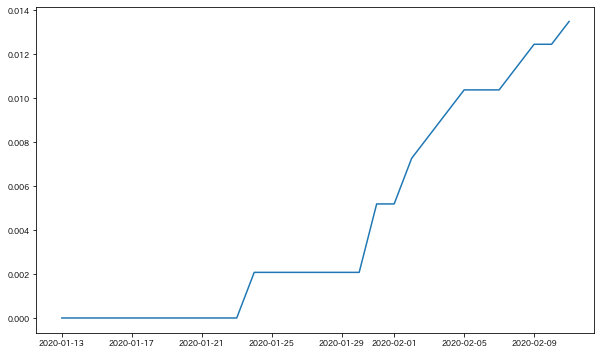

-----Yemen-----


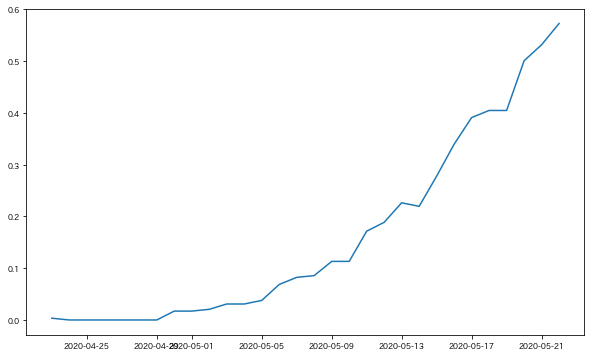

-----Zambia-----


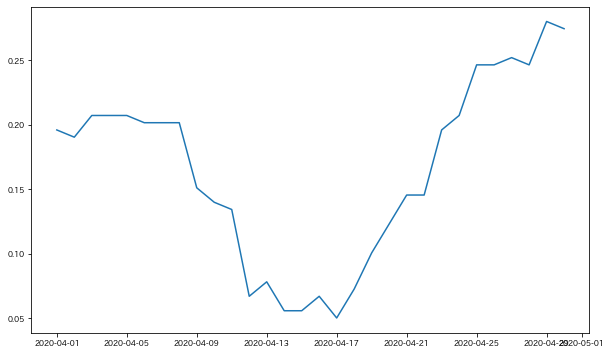

-----Zimbabwe-----


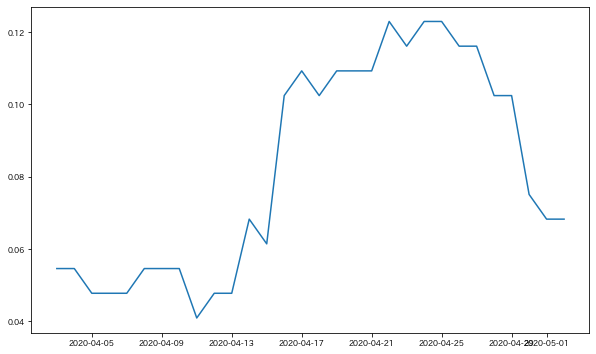

In [50]:
unique_country = df["countriesAndTerritories"].unique()

# plotの設定
plt.rcParams["font.size"] = 8

VALUE = []
COUNTRY = []

for country in unique_country:
    print("-----" + country + "-----")
    _df = df[df["countriesAndTerritories"]==country]
    _df.index=_df["datetime"]
    
    # 1ヶ月分を抽出
    _df_drop = _df[~ _df["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isnull()][-30:]
    
    plt.figure(figsize=(10,6))
    plt.plot(_df_drop["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"])
    #plt.savefig('plot_no_xy/' + country +'.png')
    plt.show()
    
    VALUE.append(_df_drop["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].values)
    COUNTRY.append(country)

In [51]:
pd.DataFrame(VALUE, COUNTRY)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Albania,7.022013,7.511109,8.209816,8.419429,8.209816,8.105010,8.524235,8.174881,8.244752,8.035139,8.209816,8.873589,9.083201,9.677103,9.502426,8.978395,8.174881,7.231625,6.987078,6.567853,6.008887,5.939016,5.554727,5.345114,5.275244,4.716277,3.947699,3.283927,3.039379,2.655090
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.034564,0.031422,0.025137,0.025137,0.025137,0.025137,0.021995,0.018853,0.018853,0.018853,0.015711,0.021995,0.025137,0.031422,0.043990,0.034564,0.034564,0.034564,0.037706,0.037706,0.037706,0.047132,0.047132,0.050274,0.053417,0.047132,0.043990,0.037706,0.025137,0.025137
Argentina,3.110717,3.186642,2.900805,3.273734,2.916437,3.088386,3.108484,2.869541,2.914204,2.887406,2.965565,2.963332,2.876241,2.737788,2.472048,2.244272,2.313498,1.980765,2.012029,1.706093,1.563174,1.464918,1.246073,1.078590,0.837415,0.652067,0.576141,0.497983,0.350598,0.285838
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.039677,0.039677,0.039677,0.051581,0.055549,0.051581,0.047613,0.043645,0.043645,0.043645,0.035710,0.027774,0.023807,0.015871,0.015871,0.015871,0.015871,0.003968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bahrain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bangladesh,2.769768,2.615823,2.364974,2.179751,1.973674,1.732638,1.452349,1.272032,1.089875,0.929798,0.721881,0.589404,0.462446,0.350821,0.266182,0.230610,0.172957,0.109785,0.076665,0.055199,0.037413,0.028213,0.026986,0.028213,0.026986,0.026373,0.026986,0.028213,0.027600,0.029440


In [52]:
 df[df["countriesAndTerritories"]=="Switzerland"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,fix_country,datetime
25841,30/06/2020,30,6,2020,35,0,Switzerland,CH,CHE,8544527.0,Europe,6.097470,Switzerland,2020-06-30
25842,29/06/2020,29,6,2020,62,0,Switzerland,CH,CHE,8544527.0,Europe,5.851699,Switzerland,2020-06-29
25843,28/06/2020,28,6,2020,69,0,Switzerland,CH,CHE,8544527.0,Europe,5.395266,Switzerland,2020-06-28
25844,27/06/2020,27,6,2020,58,0,Switzerland,CH,CHE,8544527.0,Europe,4.950537,Switzerland,2020-06-27
25845,26/06/2020,26,6,2020,52,0,Switzerland,CH,CHE,8544527.0,Europe,4.494105,Switzerland,2020-06-26
25846,25/06/2020,25,6,2020,44,2,Switzerland,CH,CHE,8544527.0,Europe,4.271740,Switzerland,2020-06-25
25847,24/06/2020,24,6,2020,22,0,Switzerland,CH,CHE,8544527.0,Europe,4.025969,Switzerland,2020-06-24
25848,23/06/2020,23,6,2020,18,0,Switzerland,CH,CHE,8544527.0,Europe,3.955749,Switzerland,2020-06-23
25849,22/06/2020,22,6,2020,0,2,Switzerland,CH,CHE,8544527.0,Europe,3.827011,Switzerland,2020-06-22
25850,21/06/2020,21,6,2020,0,0,Switzerland,CH,CHE,8544527.0,Europe,3.932342,Switzerland,2020-06-21


In [53]:
 df[df["countriesAndTerritories"]=="Switzerland"]["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].argmin()

126

In [54]:
 df[df["countriesAndTerritories"]=="Switzerland"]["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"][126:]

25967    0.0
25968    0.0
25969    0.0
25970    0.0
25971    0.0
25972    0.0
25973    0.0
25974    0.0
25975    0.0
25976    0.0
25977    0.0
25978    0.0
25979    0.0
25980    0.0
25981    0.0
25982    0.0
25983    0.0
25984    0.0
25985    0.0
25986    0.0
25987    0.0
25988    0.0
25989    0.0
25990    0.0
25991    0.0
25992    0.0
25993    0.0
25994    0.0
25995    0.0
25996    0.0
25997    0.0
25998    0.0
25999    0.0
26000    0.0
26001    0.0
26002    0.0
26003    0.0
26004    0.0
26005    0.0
26006    0.0
26007    0.0
26008    0.0
26009    0.0
26010    0.0
26011    NaN
26012    NaN
26013    NaN
26014    NaN
26015    NaN
26016    NaN
26017    NaN
26018    NaN
26019    NaN
26020    NaN
26021    NaN
26022    NaN
26023    NaN
Name: Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, dtype: float64